In [25]:
# Import necessary libraries for data manipulation, visualization, and numerical operations
import pandas as pd  # data manipulation and analysis
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt  # plotting functions
import numpy as np  # numerical operations

In [27]:
# Read in CSV file containing data for all searches created after January 1, 2020
# Source: 'Lyn's folder', generated on August 2, 2024
df = pd.read_csv('all_searches_created_after_january_1_2020.csv')

# Display the number of unique searches in the dataset based on 'Record Id'
print('Number of unique searches in dataset:', df['Record Id'].nunique())


Number of unique searches in dataset: 2558


In [29]:

# **** NOTE: DATA DOES NOT INCLUDE SN client *****


In [31]:
# Remove unnecessary 'Record Id.1' column from the dataset
df = df.drop(columns=['Record Id.1'])

In [33]:
# Questions from Susanna to be addressed in the analysis:
# - Exclude RAE (division) and SN (client).
# - Exclude 2024 data, as many searches may not have billed yet.
# 
# Main analysis focus:
# - For searches with 'K dates' in 2022 and 2023 (not 'create dates'), analyze the hours billed in 2024 (year-to-date).
# - Provide the following insights:
#    1. Total number of contracts created each year (2022 and 2023).
#    2. Total number of contracts created each year that either:
#       - Never billed, or
#       - Billed fewer than 10 hours in total.
#    3. Total number of contracts that:
#       - Billed more than 10 hours, but
#       - Did not bill any of those 10 hours within the first three months.

# Next steps will involve filtering the dataset for relevant date ranges and conditions to answer these questions.

In [35]:
# The dataset does not include SN client information.
# Exclude RAE by filtering for the relevant division, 'Patent' (RAP), as instructed.

# Filter the dataset to only include searches from the 'Patent' division
df = df[df['Division'] == 'Patent']

# Verify the unique values in the 'Division' column to confirm only 'Patent' (RAP) remains
df['Division'].unique()

array(['Patent'], dtype=object)

In [37]:
# Review the structure of the dataset by checking the number of unique values in each column
print("Number of unique values for each column:\n", df.nunique())

# Determine the percentage of missing data for each column
# maxRows represents the total number of non-null entries in 'Record Id', which will be used to calculate missing data percentages
maxRows = df['Record Id'].count()
print('Total non-null rows (maxRows):', maxRows)

# Display the percentage of missing data for each column
print('\nPercentage of Missing Data:')
print((1 - df.count() / maxRows) * 100)

Number of unique values for each column:
 Record Id             1568
Search Name           1568
Srch Created           784
Type of Case            12
Subject                 24
Case Mgr                 5
Primary Law Firm       359
Search Stage             6
Search Failed Date     534
K Date                 518
Hours Reported         750
Source                   2
Division                 1
NOS                     22
Clone?                   2
Billing Date            31
Last Billed Date        44
dtype: int64
Total non-null rows (maxRows): 5791

Percentage of Missing Data:
Record Id              0.000000
Search Name            0.000000
Srch Created           0.000000
Type of Case           2.503885
Subject                0.000000
Case Mgr               0.000000
Primary Law Firm       0.034536
Search Stage           0.000000
Search Failed Date    83.198066
K Date                14.125367
Hours Reported        17.630806
Source                 0.000000
Division               0.000000
NOS  

In [39]:
# Convert date-related columns to datetime format for easier manipulation and analysis
df['Srch Created'] = df['Srch Created'].apply(pd.to_datetime)
df['SC_Month-Year'] = df['Srch Created'].dt.to_period('M')  # Extract the month and year from 'Srch Created'

df['Search Failed Date'] = df['Search Failed Date'].apply(pd.to_datetime)
df['K Date'] = df['K Date'].apply(pd.to_datetime)
df['K_Month-Year'] = df['K Date'].dt.to_period('M')  # Extract the month and year from 'K Date'

df['Billing Date'] = df['Billing Date'].apply(pd.to_datetime)
df['Billing_Month-Year'] = df['Billing Date'].dt.to_period('M')  # Extract the month and year from 'Billing Date'

df['Last Billed Date'] = df['Last Billed Date'].apply(pd.to_datetime)
df['LastBilling_Month-Year'] = df['Last Billed Date'].dt.to_period('M')  # Extract the month and year from 'Last Billed Date'

# Extract year and month from 'K Date' and billing-related dates for further analysis
df['K_year'] = df['K Date'].dt.year  # Extract year from 'K Date'

df['K_month'] = df['K Date'].dt.month  # Extract month from 'K Date'
df['Billing_month'] = df['Billing Date'].dt.month  # Extract month from 'Billing Date'
df['SrchCreation_month'] = df['Srch Created'].dt.month  # Extract month from 'Srch Created'
df['Last_Billing_month'] = df['Last Billed Date'].dt.month  # Extract month from 'Last Billed Date'

# Print dataframe structure and counts to verify transformations
print(df.count())
df.info()

Record Id                 5791
Search Name               5791
Srch Created              5791
Type of Case              5646
Subject                   5791
Case Mgr                  5791
Primary Law Firm          5789
Search Stage              5791
Search Failed Date         973
K Date                    4973
Hours Reported            4770
Source                    5791
Division                  5791
NOS                       2947
Clone?                    5791
Billing Date              4770
Last Billed Date          4326
SC_Month-Year             5791
K_Month-Year              4973
Billing_Month-Year        4770
LastBilling_Month-Year    4326
K_year                    4973
K_month                   4973
Billing_month             4770
SrchCreation_month        5791
Last_Billing_month        4326
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5791 entries, 0 to 8553
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------        

In [45]:
# Identify and filter searches where 'K Date' is missing but 'Last Billed Date' is present
# This may indicate searches that billed without a formal contract start date.
filtered_df = df.loc[df['K Date'].isnull() & df['Last Billed Date'].notnull()]

# Display the filtered dataframe for inspection
filtered_df

# Filter out 'zcrm_1936942000102949374', which has a last billed date but may be a result of a cloned search.
# This is not considered a real contract.
df = df[df['Record Id'] != 'zcrm_1936942000102949374']

# Re-run the filter to identify searches where 'K Date' is still missing but 'Last Billed Date' is present
# after removing the cloned entry.
filtered_df = df.loc[df['K Date'].isnull() & df['Last Billed Date'].notnull()]

# Display the filtered dataframe for further inspection.
filtered_df

# At this point, the main dataframe (df) contains no searches where 'K Date' is missing but 'Last Billed Date' is present.

,Record Id,Search Name,Srch Created,Type of Case,Subject,Case Mgr,Primary Law Firm,Search Stage,Search Failed Date,K Date,...,Last Billed Date,SC_Month-Year,K_Month-Year,Billing_Month-Year,LastBilling_Month-Year,K_year,K_month,Billing_month,SrchCreation_month,Last_Billing_month


In [2880]:
# continue to identify missing data

#  id rows with kdate but no last billed date
filtered_df = df.loc[df['K Date'].notnull() & df['Last Billed Date'].isnull()]

# filter for only search stage cases completed
filtered_df=filtered_df[(filtered_df['Search Stage']=='Cases Completed (6)')]

# filter for 'Billing Date' is not null
filtered_df=filtered_df[(filtered_df['Billing Date'].notnull())]

#  sort data by Search name and then billing date
filtered_df = filtered_df.sort_values(['Search Name', 'Billing Date'])

filtered_df['Hours Reported']

# Billing date has missing data when hours reported is empty or =0.
# No need to fill missing data

6980    0.0
6276    0.0
5720    0.0
5724    0.0
5721    0.0
       ... 
2459    0.0
5142    0.0
5855    0.0
6202    0.0
6201    0.0
Name: Hours Reported, Length: 230, dtype: float64

In [2882]:
# Look at dataset numbers to get a sense of how big a dataset is available depending on the filters applied

# this is misleading as it is giving the tallies for the rows and not by search
# print("number of missing data for each field")
# print(df[['Record Id', 'Srch Created', 'Search Stage', 'K Date', 'Last Billed Date']].isnull().sum())

print('oldest srch created date', df['Srch Created'].min())
print('newest srch created date', df['Srch Created'].max())

print('oldest K date', df['K Date'].min())
print('newest K date', df['K Date'].max())

print('\nNumber of searches in dataset', df['Record Id'].nunique())

unique_combinations = df.groupby(['Record Id',  'K Date']).ngroups
print('Number of contracts in dataset:', unique_combinations)

unique_combinations = df.groupby(['Record Id', 'Last Billed Date']).ngroups
print('Number of searches with Last Billed Date in dataset:', unique_combinations)

unique_combinations = df.groupby(['Record Id',  'K Date', 'Last Billed Date']).ngroups
print('Number of contracts with Last Billed Date in dataset:', unique_combinations)

unique_combinations = df.groupby(['Record Id']).agg({'Hours Reported':'sum'})
unique_combinations_filt=unique_combinations[(unique_combinations['Hours Reported']>0)]
count=unique_combinations_filt['Hours Reported'].count()
print('Number of searches with Hours Reported >0 in dataset:', count)

stage_complete=df[(df['Search Stage']=='Cases Completed (6)') ]
unique_combinations = stage_complete.groupby(['Record Id']).ngroups
print('Number of completed searches in dataset:', unique_combinations)

stage_complete=df[(df['Search Stage']=='Cases Completed (6)') ]
unique_combinations = stage_complete.groupby(['Record Id','K Date']).ngroups
print('Number of completed contracts in dataset:', unique_combinations)

stage_complete=df[(df['Search Stage']=='Search Terminated') ]
unique_combinations = stage_complete.groupby(['Record Id']).ngroups
print('Number of terminated searches in dataset:', unique_combinations)

stage_complete=df[(df['Search Stage']=='Search Terminated') ]
unique_combinations = stage_complete.groupby(['Record Id', 'K Date']).ngroups
print('Number of terminated contracts in dataset:', unique_combinations)

stage_complete=df[(df['Search Stage']=='Cases Underway (5)') ]
unique_combinations = stage_complete.groupby(['Record Id', 'K Date']).ngroups
print('Number of cases underway contracts in dataset:', unique_combinations)

stage_complete=df[(df['Search Stage']== 'Search Terminated')|(df['Search Stage']=='Cases Completed (6)') ]
unique_combinations = stage_complete.groupby(['Record Id']).ngroups
print('Number of completed and terminated searches in dataset:', unique_combinations)

oldest srch created date 2020-01-02 00:00:00
newest srch created date 2024-03-28 00:00:00
oldest K date 2020-01-27 00:00:00
newest K date 2024-08-13 00:00:00

Number of searches in dataset 1567
Number of contracts in dataset: 750
Number of searches with Last Billed Date in dataset: 567
Number of contracts with Last Billed Date in dataset: 567
Number of searches with Hours Reported >0 in dataset: 459
Number of completed searches in dataset: 493
Number of completed contracts in dataset: 493
Number of terminated searches in dataset: 805
Number of terminated contracts in dataset: 0
Number of cases underway contracts in dataset: 257
Number of completed and terminated searches in dataset: 1298


In [2798]:
# look at whether 'Last Billed Date' is only filled when search stage is completed or terminated
# count of 'Last Billed Date' is 6201 and 'K Date' is 7084 for df
df_billdate_ck=df.groupby(['Record Id']).agg({'Hours Reported':'sum'}).reset_index()
print(df_billdate_ck.info())
df_billdate_ck.head()
#filter for search stage is completed or terminated 
# df_stage=df_billdate_ck[(df_billdate_ck['Search Stage']== 'Search Terminated')|(df['Search Stage']=='Cases Completed (6)') ]
# print(df_stage.info())

# df=df.groupby([ "Search Name", "Last Billed Date"]).agg({'Hours Reported':'sum'}).reset_index()

# why did so many records get filtered out? Last billed date only entered if contract bills hours >0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Record Id       2557 non-null   object 
 1   Hours Reported  2557 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB
None


,Record Id,Hours Reported
0,zcrm_1936942000049306001,0.0
1,zcrm_1936942000049380443,0.0
2,zcrm_1936942000049616499,0.0
3,zcrm_1936942000049653222,0.0
4,zcrm_1936942000049667665,0.0


In [2884]:
#base contract length on last bill date and not when search is closed/terminated
# this will only give a K_length for contracts that have hours reported>0, otherwise there is no Last Billed Date filled in

df['K_length']=df['Last Billed Date']-df['K Date']
df['K_length_days'] = df['K_length'].dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5790 entries, 0 to 8553
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Record Id               5790 non-null   object         
 1   Search Name             5790 non-null   object         
 2   Srch Created            5790 non-null   datetime64[ns] 
 3   Type of Case            5645 non-null   object         
 4   Subject                 5790 non-null   object         
 5   Case Mgr                5790 non-null   object         
 6   Primary Law Firm        5788 non-null   object         
 7   Search Stage            5790 non-null   object         
 8   Search Failed Date      972 non-null    datetime64[ns] 
 9   K Date                  4973 non-null   datetime64[ns] 
 10  Hours Reported          4770 non-null   float64        
 11  Source                  5790 non-null   object         
 12  Division                5790 non-null  

In [2940]:
# Determine	Number of contracts that bill within the first three months:
# o	As a percentage of the ones that bill
# o	As a percentage of the contracts that have closed overall

#filter for K date after 1/1/2022 since that is the first date of hours reported
df_K2022=df[(df['K Date']>= '2022-01-01')]
df_K2022.nunique()
print('number of contracts closed since 2022: ', df_K2022['Search Name'].nunique())

#filter out no hours reported and zero hours reported
df_K2022_hrs=df_K2022[(df_K2022['Hours Reported'].notnull()&df_K2022['Hours Reported']!=0)]
print('number of contracts closed since 2022 with hours reported: ', df_K2022_hrs['Search Name'].nunique())
df_K2022_hrs.describe()
# determine hours reported in first three months of contract closing
K2022_3mos_hrs = df_K2022_hrs[df_K2022_hrs['Billing Date'] <= df_K2022_hrs['K Date'] + pd.DateOffset(months=3)]

print('number of contracts closed since 2022 with hours reported in first three months: ',K2022_3mos_hrs['Search Name'].nunique())

number of contracts closed since 2022:  416
number of contracts closed since 2022 with hours reported:  345
number of contracts closed since 2022 with hours reported in first three months:  301


In [2990]:
# We shouldn’t be looking at 2024 numbers because many may not have billed yet.
# Could you please run the numbers for 2022 and 2023 separately? (But factoring in hours worked in 2024)
#     Searches with K dates in the years 2022 and 2023, not the create dates.  
      # We will analyze the hours billed YTD on these searches. 

# Could you please let us know the total number of contracts created each year?

# Could you please let us know the total number of contracts created each year that never billed at all OR billed LESS than 10 hours of work total.

# Could you please let us know the total number of contracts that billed MORE than 10 hours, 
# but NONE OF THOSE 10 HOURS within the first THREE months.# Determine	Number of contracts that bill within the first three months:
# o	As a percentage of the ones that bill
# o	As a percentage of the contracts that have closed overall

# ****** filter for K date for only 2022 ******
df_K2022=df[(df['K Date']>= '2022-01-01')&(df['K Date']< '2023-01-01')]
# print(df_K2022.nunique())
print('number of contracts created in 2022: ', df_K2022['Search Name'].nunique())

#filter out no hours reported and zero hours reported
df_K2022_hrs=df_K2022[(df_K2022['Hours Reported'].notnull()&df_K2022['Hours Reported']!=0)]
print('number of contracts created in 2022 with hours reported: ', df_K2022_hrs['Search Name'].nunique())
df_K2022_hrs.describe()

# determine hours reported in first three months of contract closing
# first determine the number of contracts reporting hours in the first 3 mos
K2022_3mos_hrs = df_K2022_hrs[df_K2022_hrs['Billing Date'] <= df_K2022_hrs['K Date'] + pd.DateOffset(months=3)]
print('number of contracts created in 2022 with hours reported in first three months: ',K2022_3mos_hrs['Search Name'].nunique())

# determine the number of hours reported
ag_K2022_3mos_hrs = K2022_3mos_hrs.groupby(['Record Id']).agg({'Hours Reported':'sum'}).reset_index()
ag_K2022_3mos_hrs.describe()

# how many of those are under 10 hours
under_10=ag_K2022_3mos_hrs[ag_K2022_3mos_hrs['Hours Reported']<10]
print('under 10 hours reported in first three months \n',under_10.describe())
print('number of contracts reporting under 10 hours in first three months:', under_10['Record Id'].nunique())

# look at the contracts that reported under 10 hours in the first three months to see if they reported hours later.
# filter original dataset for under10 records
under10_after_3mos = df_K2022_hrs[df_K2022_hrs['Record Id'].isin(under_10['Record Id'])]

# aggregate records for hours reported
ag_under10_after_3mos = under10_after_3mos.groupby(['Record Id']).agg({'Hours Reported':'sum'}).reset_index()
have_hours=ag_under10_after_3mos[ag_under10_after_3mos['Hours Reported']>10]
print('number of contracts that reported under 10 hours in the first three months that later reported hours: ', have_hours['Hours Reported'].count())

# filter out any that don't report > 10 hours
over_10_after_3mos=ag_under10_after_3mos[ag_under10_after_3mos['Hours Reported']>=10]
# print('number of contracts that reported under 10 hours in the first three months that later reported over 10 hours:', over_10_after_3mos['Hours Reported'].count())
print('To date stats for contracts that initially reported under 10 hours within 3 mos \n',over_10_after_3mos.describe())

# df_K2022_hrs.info()

number of contracts created in 2022:  173
number of contracts created in 2022 with hours reported:  145
number of contracts created in 2022 with hours reported in first three months:  118
under 10 hours reported in first three months 
        Hours Reported
count       37.000000
mean         5.238189
std          2.897226
min          0.200000
25%          3.000000
50%          5.300000
75%          8.000000
max          9.250000
number of contracts reporting under 10 hours in first three months: 37
number of contracts that reported under 10 hours in the first three months that later reported hours:  18
To date stats for contracts that initially reported under 10 hours within 3 mos 
        Hours Reported
count       18.000000
mean       130.155556
std        185.386518
min         12.250000
25%         21.382500
50%         47.250000
75%        157.447500
max        714.600000


In [2994]:
# We shouldn’t be looking at 2024 numbers because many may not have billed yet.
# Could you please run the numbers for 2022 and 2023 separately? (But factoring in hours worked in 2024)
#     Searches with K dates in the years 2022 and 2023, not the create dates.  
      # We will analyze the hours billed YTD on these searches. 

# Could you please let us know the total number of contracts created each year?

# Could you please let us know the total number of contracts created each year that never billed at all OR billed LESS than 10 hours of work total.

# Could you please let us know the total number of contracts that billed MORE than 10 hours, 
# but NONE OF THOSE 10 HOURS within the first THREE months.# Determine	Number of contracts that bill within the first three months:
# o	As a percentage of the ones that bill
# o	As a percentage of the contracts that have closed overall

# ****** filter for K date for only 2023 ******
df_K2023=df[(df['K Date']>= '2023-01-01')&(df['K Date']< '2024-01-01')]
# print(df_K2023.nunique())
print('number of contracts created in 2023: ', df_K2023['Search Name'].nunique())

#filter out no hours reported and zero hours reported
df_K2023_hrs=df_K2023[(df_K2023['Hours Reported'].notnull()&df_K2023['Hours Reported']!=0)]
print('number of contracts created in 2023 with hours reported: ', df_K2023_hrs['Search Name'].nunique())
df_K2023_hrs.describe()

# determine hours reported in first three months of contract closing
# first determine the number of contracts reporting hours in the first 3 mos
K2023_3mos_hrs = df_K2023_hrs[df_K2023_hrs['Billing Date'] <= df_K2023_hrs['K Date'] + pd.DateOffset(months=3)]
print('number of contracts created in 2023 with hours reported in first three months: ',K2023_3mos_hrs['Search Name'].nunique())

# determine the number of hours reported
ag_K2023_3mos_hrs = K2023_3mos_hrs.groupby(['Record Id']).agg({'Hours Reported':'sum'}).reset_index()
ag_K2023_3mos_hrs.describe()

# how many of those are under 10 hours
under_10=ag_K2023_3mos_hrs[ag_K2023_3mos_hrs['Hours Reported']<10]
print('under 10 hours reported in first three months \n',under_10.describe())
print('number of contracts reporting under 10 hours in first three months:', under_10['Record Id'].nunique())

# look at the contracts that reported under 10 hours in the first three months to see if they reported hours later.
# filter original dataset for under10 records
under10_after_3mos = df_K2023_hrs[df_K2023_hrs['Record Id'].isin(under_10['Record Id'])]

# aggregate records for hours reported
ag_under10_after_3mos = under10_after_3mos.groupby(['Record Id']).agg({'Hours Reported':'sum'}).reset_index()
have_hours=ag_under10_after_3mos[ag_under10_after_3mos['Hours Reported']>10]
print('number of contracts created in 2023 that reported under 10 hours in the first three months that later reported hours: ', have_hours['Hours Reported'].count())

# filter out any that don't report > 10 hours
over_10_after_3mos=ag_under10_after_3mos[ag_under10_after_3mos['Hours Reported']>=10]
# print('number of contracts that reported under 10 hours in the first three months that later reported over 10 hours:', over_10_after_3mos['Hours Reported'].count())
print('To date stats for contracts created in 2023 that initially reported under 10 hours within 3 mos \n',over_10_after_3mos.describe())

number of contracts created in 2023:  163
number of contracts created in 2023 with hours reported:  140
number of contracts created in 2023 with hours reported in first three months:  126
under 10 hours reported in first three months 
        Hours Reported
count       44.000000
mean         4.478636
std          2.778533
min          0.200000
25%          2.187500
50%          4.050000
75%          6.500000
max          9.750000
number of contracts reporting under 10 hours in first three months: 44
number of contracts created in 2023 that reported under 10 hours in the first three months that later reported hours:  20
To date stats for contracts created in 2023 that initially reported under 10 hours within 3 mos 
        Hours Reported
count       20.000000
mean        49.402000
std         55.812514
min         10.500000
25%         16.062500
50%         26.300000
75%         58.250000
max        198.000000


In [2982]:
print(df_K2022_hrs['Hours Reported'].isnull().sum())  # This should return 0.
print(df_K2022.shape[0] - df_K2022_hrs.shape[0])  # This should give the count of nulls filtered out.


0
926


In [2816]:
print(df['Search Stage'].unique())

#filter out no reported hours and zero hours reported
df_K2022=df_K2022[(df_K2022['Hours Reported'].notnull()& df_K2022['Hours Reported']!=0)]

df_K2022['Hours Reported'].describe()

['Cases Underway (5)' 'Cases Completed (6)' 'Search Terminated'
 'Experts Presented (3)' 'Interviewing (2)'
 'Contract Request - Patent (4)' 'Contract Request - Expansion (4)'
 'Expert Search Underway (2)']


count    2066.000000
mean       22.111682
std        36.758057
min         0.100000
25%         3.500000
50%         9.350000
75%        24.560000
max       386.800000
Name: Hours Reported, dtype: float64

In [2818]:
print('Stats for dataset (df_K2022) representing K date after 1/1/2022 and hours reported not null')

print('oldest srch created date', df_K2022['Srch Created'].min())
print('newest srch created date', df_K2022['Srch Created'].max())

print('oldest K date', df_K2022['K Date'].min())
print('newest K date', df_K2022['K Date'].max())

print('\nNumber of searches in dataset', df_K2022['Record Id'].nunique())

unique_combinations = df_K2022.groupby(['Record Id',  'K Date']).ngroups
print('Number of contracts in dataset:', unique_combinations)

unique_combinations = df_K2022.groupby(['Record Id', 'Last Billed Date']).ngroups
print('Number of searches with Last Billed Date in dataset:', unique_combinations)

unique_combinations = df_K2022.groupby(['Record Id',  'K Date', 'Last Billed Date']).ngroups
print('Number of contracts with Last Billed Date in dataset:', unique_combinations)

unique_combinations = df_K2022.groupby(['Record Id']).agg({'Hours Reported':'sum'})
unique_combinations_filt=unique_combinations[(unique_combinations['Hours Reported']>0)]
count=unique_combinations_filt['Hours Reported'].count()
print('Number of searches with Hours Reported >0 in dataset:', count)

stage_complete=df_K2022[(df_K2022['Search Stage']=='Cases Completed (6)') ]
unique_combinations = stage_complete.groupby(['Record Id']).ngroups
print('Number of completed searches in dataset:', unique_combinations)

stage_complete=df_K2022[(df_K2022['Search Stage']=='Cases Completed (6)') ]
unique_combinations = stage_complete.groupby(['Record Id','K Date']).ngroups
print('Number of completed contracts in dataset:', unique_combinations)

stage_complete=df_K2022[(df_K2022['Search Stage']=='Search Terminated') ]
unique_combinations = stage_complete.groupby(['Record Id']).ngroups
print('Number of terminated searches in dataset:', unique_combinations)

stage_complete=df_K2022[(df_K2022['Search Stage']=='Search Terminated') ]
unique_combinations = stage_complete.groupby(['Record Id', 'K Date']).ngroups
print('Number of terminated contracts in dataset:', unique_combinations)

stage_complete=df_K2022[(df_K2022['Search Stage']=='Cases Underway (5)') ]
unique_combinations = stage_complete.groupby(['Record Id', 'K Date']).ngroups
print('Number of cases underway contracts in dataset:', unique_combinations)

stage_complete=df_K2022[(df_K2022['Search Stage']== 'Search Terminated')|(df_K2022['Search Stage']=='Cases Completed (6)') ]
unique_combinations = stage_complete.groupby(['Record Id']).ngroups
print('Number of completed and terminated searches in dataset:', unique_combinations)

Stats for dataset (df_K2022) representing K date after 1/1/2022 and hours reported not null
oldest srch created date 2021-07-20 00:00:00
newest srch created date 2024-03-28 00:00:00
oldest K date 2022-01-03 00:00:00
newest K date 2024-06-25 00:00:00

Number of searches in dataset 529
Number of contracts in dataset: 529
Number of searches with Last Billed Date in dataset: 528
Number of contracts with Last Billed Date in dataset: 528
Number of searches with Hours Reported >0 in dataset: 529
Number of completed searches in dataset: 262
Number of completed contracts in dataset: 262
Number of terminated searches in dataset: 0
Number of terminated contracts in dataset: 0
Number of cases underway contracts in dataset: 267
Number of completed and terminated searches in dataset: 262


In [2820]:
# filter df_K2022 for search stage completed 
df_K2022_complete=df_K2022[(df_K2022['Search Stage']=='Cases Completed (6)') ]
print(df_K2022_complete['Search Stage'].unique())
df_K2022_complete.info()

['Cases Completed (6)']
<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 17 to 5279
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Record Id               924 non-null    object         
 1   Search Name             924 non-null    object         
 2   Srch Created            924 non-null    datetime64[ns] 
 3   Type of Case            911 non-null    object         
 4   Subject                 917 non-null    object         
 5   Case Mgr                924 non-null    object         
 6   Primary Law Firm        924 non-null    object         
 7   Search Stage            924 non-null    object         
 8   Search Failed Date      37 non-null     datetime64[ns] 
 9   K Date                  924 non-null    datetime64[ns] 
 10  Hours Reported          924 non-null    float64        
 11  Source                  924 non-null    object         
 12  Division       

In [2822]:

df_K2022_hours=df_K2022[(df_K2022['Hours Reported']>0)]
df_K2022_hours['Hours Reported'].min()
df_K2022_hours.nunique()

Record Id                 529
Search Name               529
Srch Created              345
Type of Case               12
Subject                    24
Case Mgr                    4
Primary Law Firm          220
Search Stage                2
Search Failed Date         17
K Date                    359
Hours Reported            724
Source                      2
Division                    2
NOS                        26
Clone?                      2
Billing Date               31
Last Billed Date           31
SC_Month-Year              33
K_Month-Year               30
Billing_Month-Year         31
LastBilling_Month-Year     31
K_year                      3
K_month                    12
Billing_month              12
SrchCreation_month         12
Last_Billing_month         12
K_length                  314
K_length_days             314
dtype: int64

In [2824]:
df_hours=df[(df['Hours Reported']>0)]
df_hours=df_hours[(df_hours['Billing Date']>'2021-12-31')]
df_hours['Billing Date'].min()
df_hours.nunique()

Record Id                 670
Search Name               670
Srch Created              453
Type of Case               12
Subject                    24
Case Mgr                    4
Primary Law Firm          258
Search Stage                2
Search Failed Date         21
K Date                    471
Hours Reported            854
Source                      2
Division                    2
NOS                        31
Clone?                      2
Billing Date               31
Last Billed Date           31
SC_Month-Year              51
K_Month-Year               52
Billing_Month-Year         31
LastBilling_Month-Year     31
K_year                      5
K_month                    12
Billing_month              12
SrchCreation_month         12
Last_Billing_month         12
K_length                  405
K_length_days             405
dtype: int64

In [2826]:
# stats for all contracts created since 2022 and billing since 2022
# Step 1: Aggregate data
# Group by 'Billing Date' and sum 'Hours Reported'
sum_hours_df_K2022 = df_K2022_hours.groupby('Record Id').agg({'Hours Reported': 'sum'}).reset_index()
sum_hours_df_K2022.describe()

,Hours Reported
count,529.000000
mean,86.356779
std,228.460855
min,0.250000
25%,10.500000
50%,30.750000
75%,87.400000
max,4235.200000


In [2828]:
# Stats for all contracts (created from 2020 on) billing since 2022
# Step 1: Aggregate data
# Group by 'Billing Date' and sum 'Hours Reported'
sum_hours_df = df_hours.groupby('Record Id').agg({'Hours Reported': 'sum'}).reset_index()
sum_hours_df.describe()

,Hours Reported
count,670.000000
mean,92.088145
std,219.516969
min,0.250000
25%,11.712500
50%,34.060000
75%,97.187500
max,4235.200000


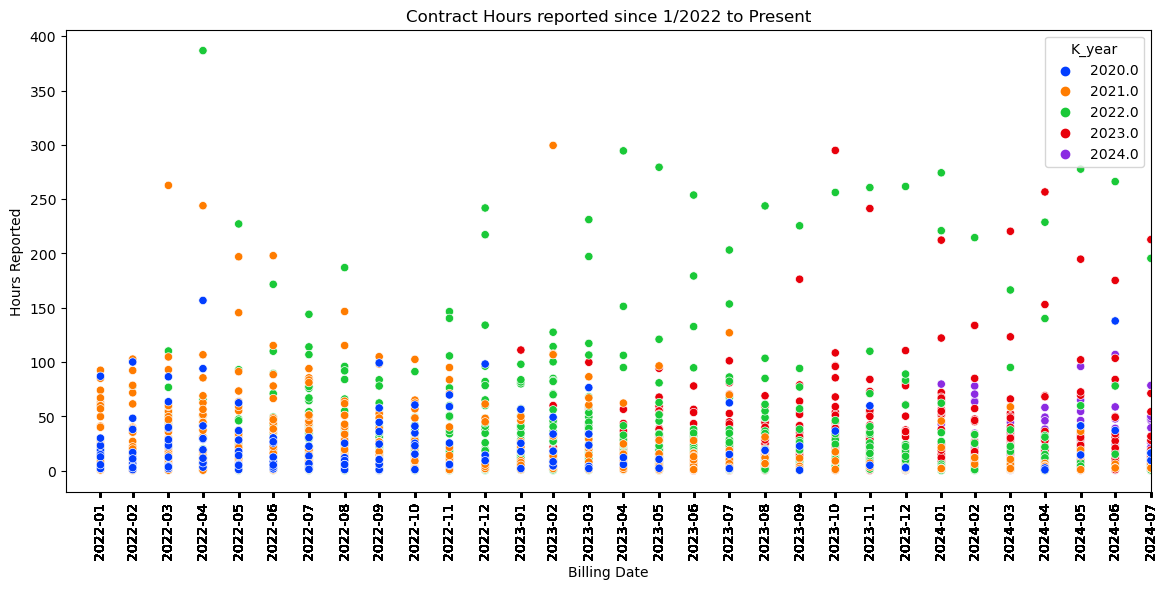

In [2834]:
# use df_hours dataset to show hours billed for all contracts billed in 2022 to present. 
# Show only billing from 1/2022 to present - when hour reported were entered into Zoho

plt.figure(figsize=(14, 6))

# Use Seaborn's scatterplot
palette = sns.color_palette("bright", n_colors=5)
sns.scatterplot(x='Billing Date', y='Hours Reported', data=df_hours, hue='K_year', palette=palette)

plt.title('Contract Hours reported since 1/2022 to Present')

# Set x-axis ticks and labels for every Billing Date value
plt.xticks(ticks=df_hours['Billing Date'], labels=df_hours['Billing Date'].dt.strftime('%Y-%m'), rotation=90)

# Set x-axis limits to start at 2022-01
start_date = pd.to_datetime('2022-01-01')
plt.xlim([start_date, df_hours['Billing Date'].max()])

plt.xlabel('Billing Date')
plt.ylabel('Hours Reported')

plt.show()


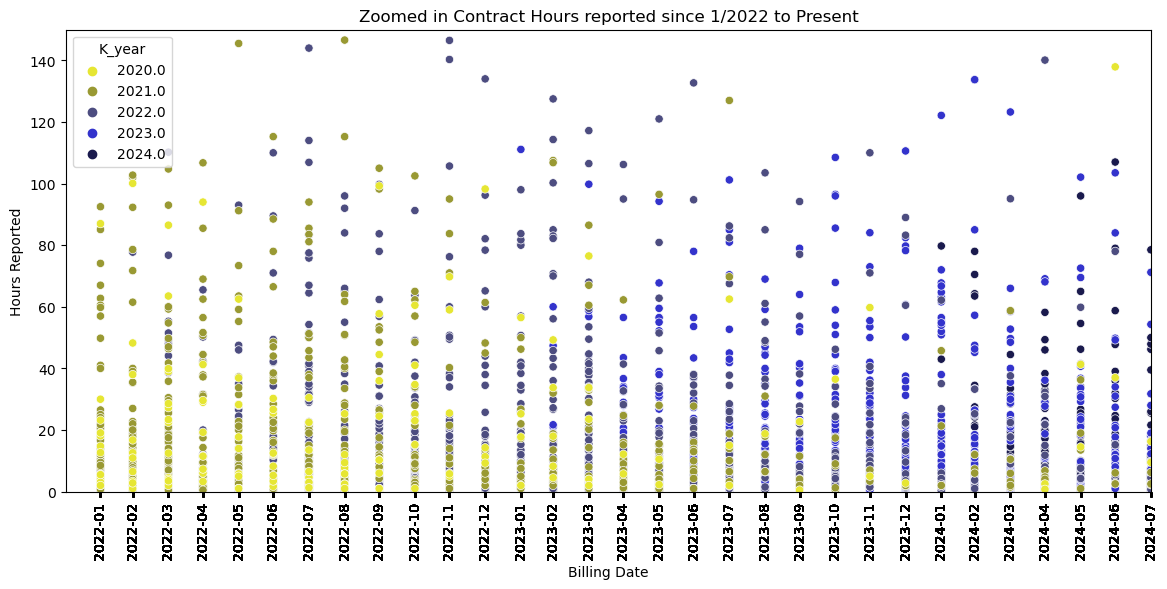

In [2836]:
# use df_hours dataset to show hours billed for all contracts billed in 2022 to present. 
# Show only billing from 1/2022 to present - when hour reported were entered into Zoho

plt.figure(figsize=(14, 6))

# Use Seaborn's scatterplot
# palette = sns.color_palette("Spectral", as_cmap=True, n_colors=5)
palette = sns.color_palette([(0.9, 0.9, 0.2), (0.6, 0.6, 0.2), (0.3, 0.3, 0.5), (0.2, 0.2, 0.8), (0.1, 0.1, 0.3)])
sns.scatterplot(x='Billing Date', y='Hours Reported', data=df_hours, hue='K_year', palette=palette)



plt.title('Zoomed in Contract Hours reported since 1/2022 to Present')

# Set x-axis ticks and labels for every Billing Date value
plt.xticks(ticks=df_hours['Billing Date'], labels=df_hours['Billing Date'].dt.strftime('%Y-%m'), rotation=90)

# Set x-axis limits to start at 2022-01
start_date = pd.to_datetime('2022-01-01')
plt.xlim([start_date, df_hours['Billing Date'].max()])
plt.ylim([0, 150])
plt.xlabel('Billing Date')
plt.ylabel('Hours Reported')

plt.show()


In [2838]:
df_hours['Hours Reported'].describe()

count    2745.000000
mean       22.476888
std        35.745334
min         0.100000
25%         3.750000
50%        10.000000
75%        25.920000
max       386.800000
Name: Hours Reported, dtype: float64

/var/folders/rb/1vf00zrd5fzfvg8dgkbyf5hr0000gn/T/ipykernel_86317/2659492946.py:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='Billing Date', y='Hours Reported', data= df_hours, hue='K_year', palette=palette)


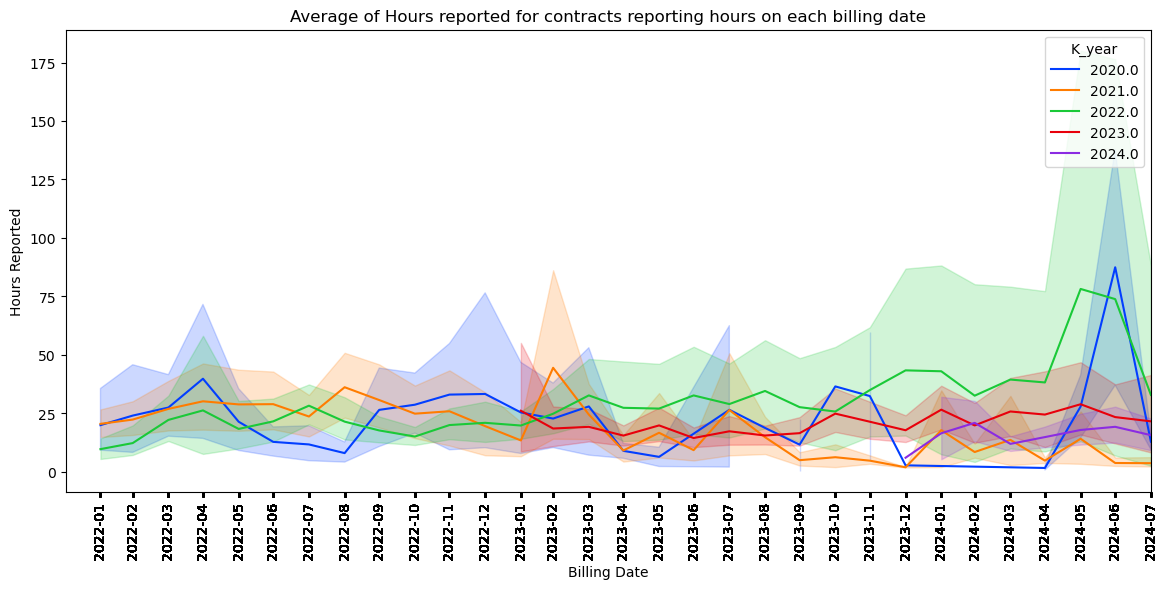

In [2844]:
# use df_hours dataset to show hours billed for all contracts billed in 2022 to present. 

# The line is computed based on the average or smoothed trend of the Hours Reported values for each Billing Date. 
# It helps visualize the general pattern or direction in the data despite the presence of variability.

# Shading: The shaded region around the line represents the confidence interval or range of uncertainty around the average trend. 
# It is calculated based on the distribution of the data points for each x value. 
# This shading can help you understand the reliability of the trend line and how much variability exists at each point.

# 

plt.figure(figsize=(14, 6))
palette = sns.color_palette("bright")
sns.lineplot(x='Billing Date', y='Hours Reported', data= df_hours, hue='K_year', palette=palette)
plt.title('Average of Hours reported for contracts reporting hours on each billing date')

# Set x-axis ticks and labels for every Billing Date value
plt.xticks(ticks=df_hours['Billing Date'], labels=df_hours['Billing Date'].dt.strftime('%Y-%m'), rotation=90)

# Set x-axis limits to start at 2022-01
start_date = pd.to_datetime('2022-01-01')
plt.xlim([start_date, df_hours['Billing Date'].max()])

plt.xlabel('Billing Date')
plt.ylabel('Hours Reported')

plt.show()

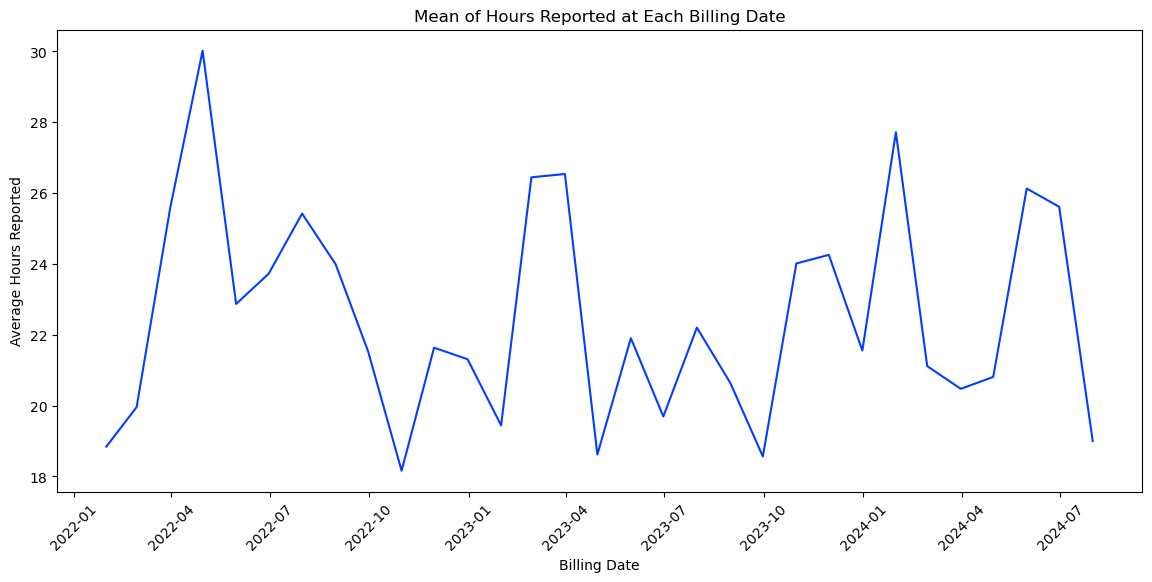

In [2415]:
# Look at the average of hours reported 
# Start with df_hours dataset to show hours billed for all contracts billed in 2022 to present. 
    
# Step 1: Aggregate data
# Group by 'Billing Date' and sum 'Hours Reported'
aggregated_df = df_hours.groupby('Billing Date').agg({'Hours Reported': 'mean'}).reset_index()

# Step 2: Plot aggregated data
plt.figure(figsize=(14, 6))

# Line plot to show the sum of hours reported over billing dates
sns.lineplot(x='Billing Date', y='Hours Reported', data=aggregated_df)

plt.title('Mean of Hours Reported at Each Billing Date')
plt.xlabel('Billing Date')
plt.ylabel('Average Hours Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [2856]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2745 entries, 5 to 7081
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Record Id               2745 non-null   object         
 1   Search Name             2745 non-null   object         
 2   Srch Created            2745 non-null   datetime64[ns] 
 3   Type of Case            2684 non-null   object         
 4   Subject                 2732 non-null   object         
 5   Case Mgr                2745 non-null   object         
 6   Primary Law Firm        2745 non-null   object         
 7   Search Stage            2745 non-null   object         
 8   Search Failed Date      96 non-null     datetime64[ns] 
 9   K Date                  2745 non-null   datetime64[ns] 
 10  Hours Reported          2745 non-null   float64        
 11  Source                  2745 non-null   object         
 12  Division                2745 non-null  

In [2858]:
# Look at the sum of hours reported 
# Start with df_hours dataset to show hours billed for all contracts billed in 2022 to present. 

# Step 1: Aggregate data
# Group by 'Billing Date' and sum 'Hours Reported'
aggregated_df = df_hours.groupby('Billing Date', 'K_year').agg({'Hours Reported': 'sum'}).reset_index()

# Step 2: Plot aggregated data
plt.figure(figsize=(14, 6))

# Line plot to show the sum of hours reported over billing dates
sns.lineplot(x='Billing Date', y='Hours Reported', data=aggregated_df, hue='K_year')

plt.title('Sum of Hours Reported at Each Billing Date')
plt.xlabel('Billing Date')
plt.ylabel('Total Hours Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


ValueError: No axis named K_year for object type DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Billing Date    31 non-null     datetime64[ns]
 1   Hours Reported  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 628.0 bytes


In [2172]:
#look at distribution of the number of billing contracts in each month of the year - for contracts reporting hours
# use df_hours dataset to show hours billed for all contracts billed in 2022 to present. 


In [2459]:
# Ensure that Billing_month is treated as an integer
df_hours['Billing_month'] = df_hours['Billing_month'].astype(int)
df_hours['Billing_month'].unique()


array([ 7,  5,  6,  4,  3,  2,  1, 12, 11, 10,  9,  8])

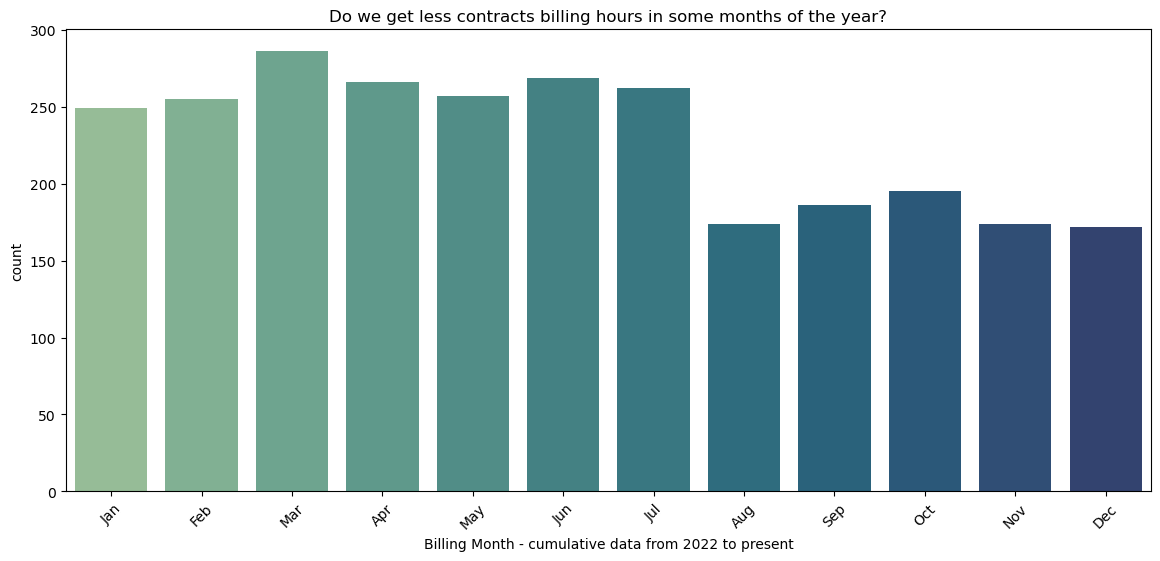

In [2548]:
plt.figure(figsize=(14, 6))

# Define the month order (1-12)
month_order = list(range(1, 13)) 
months=['Jan','Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
c=sns.color_palette("crest", n_colors=12)
sns.countplot(x = 'Billing_month', data=df_hours, order=month_order, palette =c)


# Set x-axis labels for the months of the year
plt.xticks(ticks=range(len(month_order)), labels=months, rotation=45)

plt.xlabel('Billing Month - cumulative data from 2022 to present')
plt.title('Do we get less contracts billing hours in some months of the year?')
plt.show()

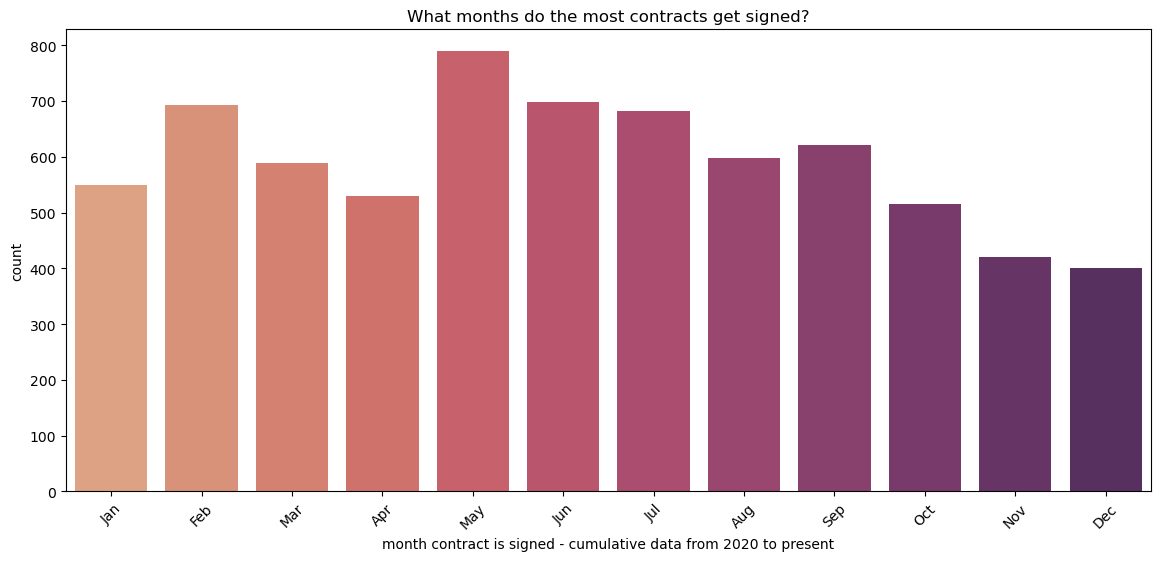

In [2558]:
# use df dataset to determine contracts signed based on K date
# takes into account all data since 2020
plt.figure(figsize=(14, 6))

c=sns.color_palette("flare", n_colors=12)

# Define the month order (1-12)
month_order = list(range(1, 13)) 
months=['Jan','Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x = 'K_month', data=df, order=month_order, palette=c)


# Set x-axis labels for the months of the year
plt.xticks(ticks=range(len(month_order)), labels=months, rotation=45)

plt.xlabel('month contract is signed - cumulative data from 2020 to present')
plt.title('What months do the most contracts get signed?')
plt.show()

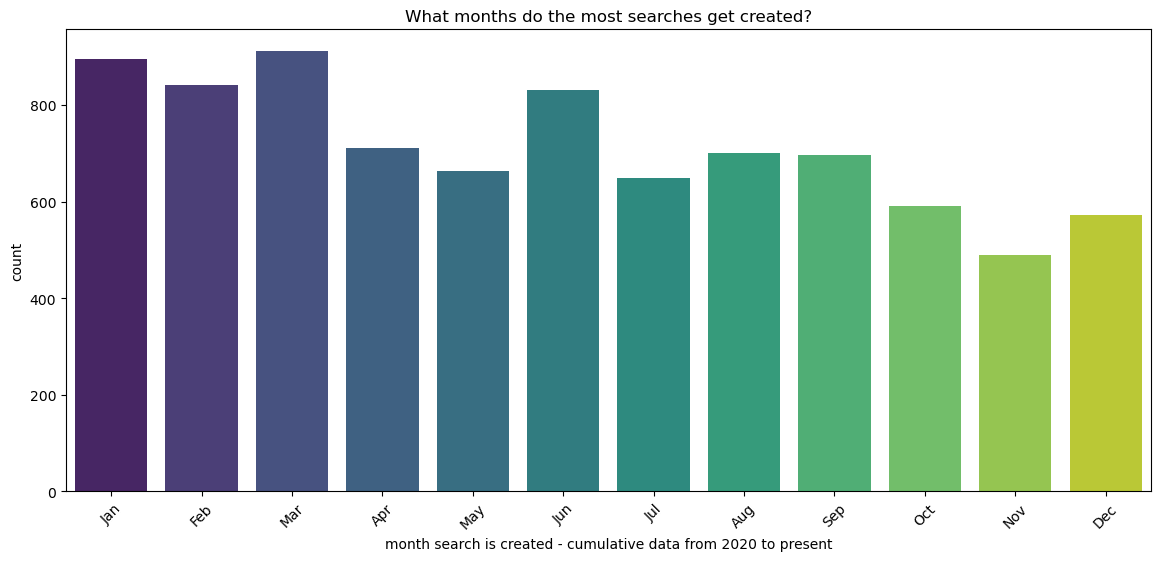

In [2562]:
#look at distribution of searches created across each month of the year
# use df dataset to determine searches created based on Srch Created date
plt.figure(figsize=(14, 6))

c=sns.color_palette("viridis", n_colors=12)

# Define the month order (1-12)
month_order = list(range(1, 13)) 
months=['Jan','Feb', 'Mar', 'Apr', 'May','Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x = 'SrchCreation_month', data=df, order=month_order, palette=c)


# Set x-axis labels for the months of the year
plt.xticks(ticks=range(len(month_order)), labels=months, rotation=45)

plt.xlabel('month search is created - cumulative data from 2020 to present')
plt.title('What months do the most searches get created?')
plt.show()

In [1719]:
df_contract.describe()

,Srch Created,Search Failed Date,K Date,Hours Reported,Billing Date,Last Billed Date,K_year,K_month,Billing_month,SrchCreation_month,K_length,K_length_days
count,2093,54,2093,2093.000000,2093,1948,2093.000000,2093.000000,2093.000000,2093.000000,1948,1948.000000
mean,2022-09-02 17:25:46.297181184,2022-08-31 12:26:40,2022-10-21 17:09:15.566172928,9.284962,2023-06-16 12:52:37.955088384,2023-05-29 05:37:05.051334656,2022.377449,5.626851,5.967511,5.856187,222 days 18:01:28.706365504,222.751027
min,2021-07-20 00:00:00,2021-09-02 00:00:00,2022-01-03 00:00:00,0.000000,2022-01-31 00:00:00,2022-01-31 00:00:00,2022.000000,1.000000,1.000000,1.000000,2 days 00:00:00,2.000000
25%,2022-03-29 00:00:00,2022-07-11 00:00:00,2022-05-20 00:00:00,0.000000,2023-01-31 00:00:00,2022-12-31 00:00:00,2022.000000,3.000000,3.000000,3.000000,72 days 00:00:00,72.000000
50%,2022-08-09 00:00:00,2022-07-18 00:00:00,2022-09-27 00:00:00,0.000000,2023-06-30 00:00:00,2023-05-31 00:00:00,2022.000000,6.000000,6.000000,5.000000,173 days 00:00:00,173.000000
75%,2023-02-07 00:00:00,2022-08-06 00:00:00,2023-03-23 00:00:00,7.500000,2023-10-31 00:00:00,2023-10-31 00:00:00,2023.000000,8.000000,9.000000,9.000000,340 days 00:00:00,340.000000
max,2024-02-28 00:00:00,2023-07-10 00:00:00,2024-05-06 00:00:00,386.800000,2024-07-31 00:00:00,2024-07-31 00:00:00,2024.000000,12.000000,12.000000,12.000000,792 days 00:00:00,792.000000
std,NaN,NaN,NaN,23.902672,NaN,NaN,0.527366,3.068963,3.381269,3.380556,172 days 14:41:28.753778424,172.612138


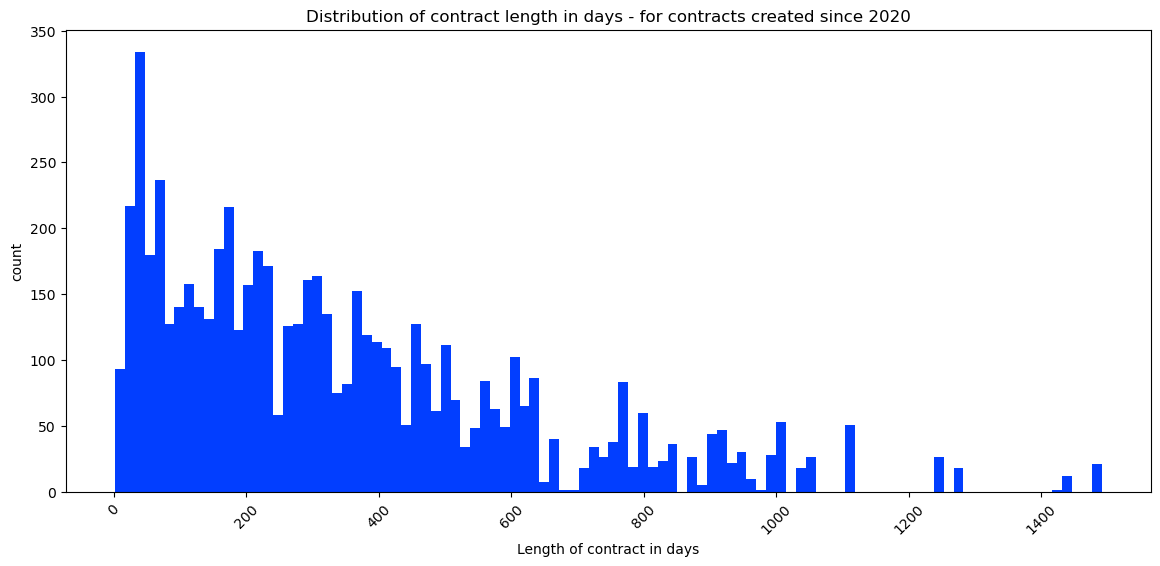

count    6200.000000
mean      348.775161
std       284.892956
min         2.000000
25%       130.000000
50%       283.000000
75%       496.000000
max      1491.000000
Name: K_length_days, dtype: float64


In [2516]:
#contract length is based on last bill date and not when search is closed/terminated
# this will only give a K_length for contracts that have hours reported>0, otherwise there is no Last Billed Date filled in

plt.figure(figsize=(14, 6))

plt.hist(df['K_length_days'], bins=100)
plt.xticks(rotation=45)
plt.title('Distribution of contract length in days - for contracts created since 2020')
plt.xlabel('Length of contract in days')
plt.ylabel('count')
plt.show()
print(df['K_length_days'].describe())

In [1625]:
#sum hours reported for contracts
contract=df_contract.groupby(['Record Id', 'Search Name', 'Srch Created',"Type of Case", 'Subject', 'Case Mgr','Primary Law Firm','Search Stage','K Date','K_length_days','K_Month-Year','K_year','SC_Month-Year','Source','Division','Clone?']).agg({'Hours Reported':'sum'})
contract = contract.reset_index()
contract["Hours Reported"].describe()

count    252.000000
mean      75.270977
std      135.048767
min        0.250000
25%       10.000000
50%       27.125000
75%       75.125000
max      926.500000
Name: Hours Reported, dtype: float64

In [1701]:
# filter for hours reported greater than 0
contract_hours= contract[(contract['Hours Reported']> 0)]

print('median hours reported',contract_hours['Hours Reported'].median())
print('mean hours reported',contract_hours['Hours Reported'].mean())
print('max hours reported',contract_hours['Hours Reported'].max())
# filter for hours reported greater than mean
# top_contract_hours= contract[(contract['Hours Reported']> contract_hours['Hours Reported'].mean())]
# top_contract_hours.info()

median hours reported 27.125
mean hours reported 75.27097738095237
max hours reported 926.5


/var/folders/rb/1vf00zrd5fzfvg8dgkbyf5hr0000gn/T/ipykernel_86317/652995883.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='K_length_days', y='Hours Reported', data= contract_hours, hue = 'K_year', palette=palette)


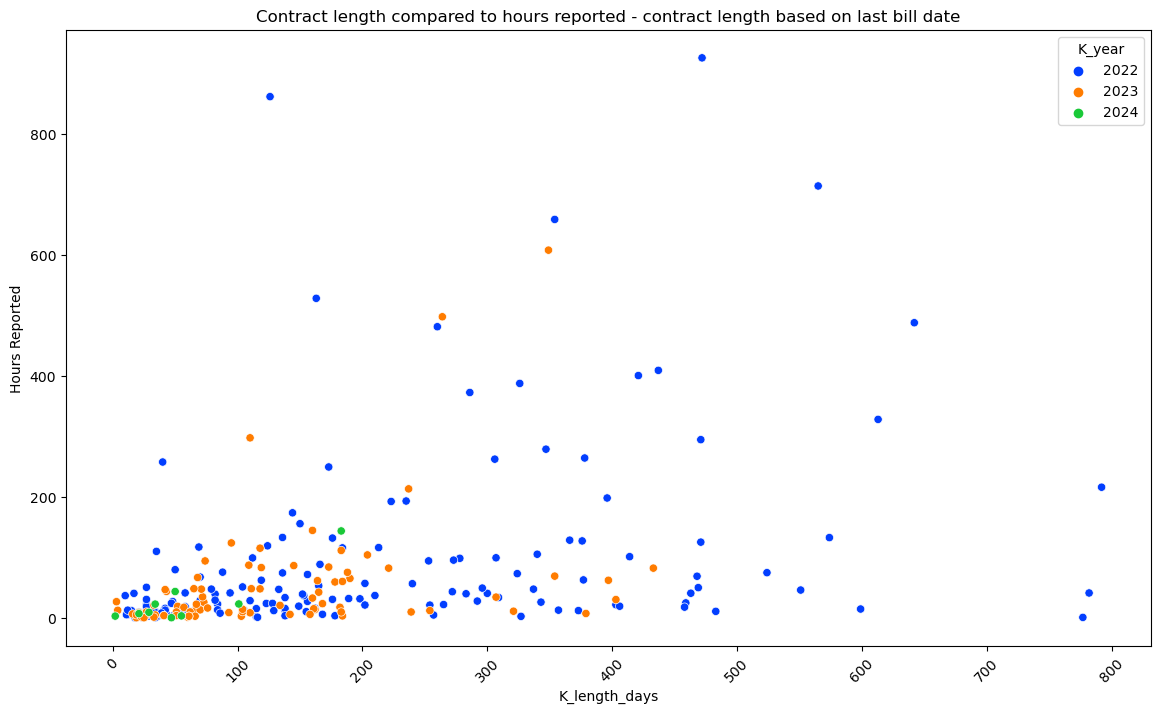

In [1717]:
# compare hours reported to contract duration
#contract length based on last bill date and not when search is closed/terminated
plt.figure(figsize=(14, 8))
palette = sns.color_palette("bright")
sns.scatterplot(x='K_length_days', y='Hours Reported', data= contract_hours, hue = 'K_year', palette=palette)

# # Add a trendline using regplot (without the hue parameter)
# # Loop over each unique hue category and add a trendline
# for year in contract_hours['K_year'].unique():
#     sns.regplot(x='K_length_days', y='Hours Reported', 
#                 data=contract_hours[contract_hours['K_year'] == year], 
#                 scatter=False, label=year)


plt.title('Contract length compared to hours reported - contract length based on last bill date')
plt.xticks(rotation=45)
plt.show()

/var/folders/rb/1vf00zrd5fzfvg8dgkbyf5hr0000gn/T/ipykernel_86317/748267814.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='K_length_days', y='Hours Reported', data= contract_hours, hue = 'K_year', palette=palette)


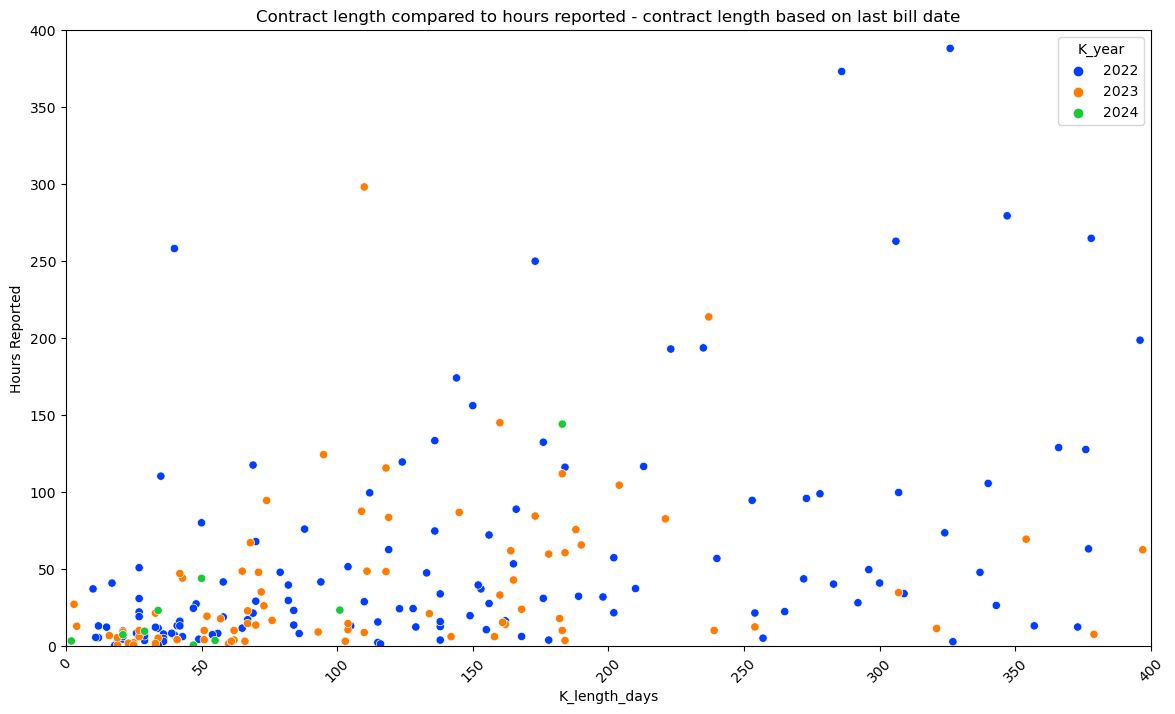

In [1729]:
# compare hours reported to contract duration
#contract length based on last bill date and not when search is closed/terminated
plt.figure(figsize=(14, 8))
palette = sns.color_palette("bright")
sns.scatterplot(x='K_length_days', y='Hours Reported', data= contract_hours, hue = 'K_year', palette=palette)

# # Add a trendline using regplot (without the hue parameter)
# # Loop over each unique hue category and add a trendline
# for year in contract_hours['K_year'].unique():
#     sns.regplot(x='K_length_days', y='Hours Reported', 
#                 data=contract_hours[contract_hours['K_year'] == year], 
#                 scatter=False, label=year)

plt.title('Contract length compared to hours reported - contract length based on last bill date')
plt.ylim(0, 400)
plt.xlim(0, 400)
plt.xticks(rotation=45)
plt.show()

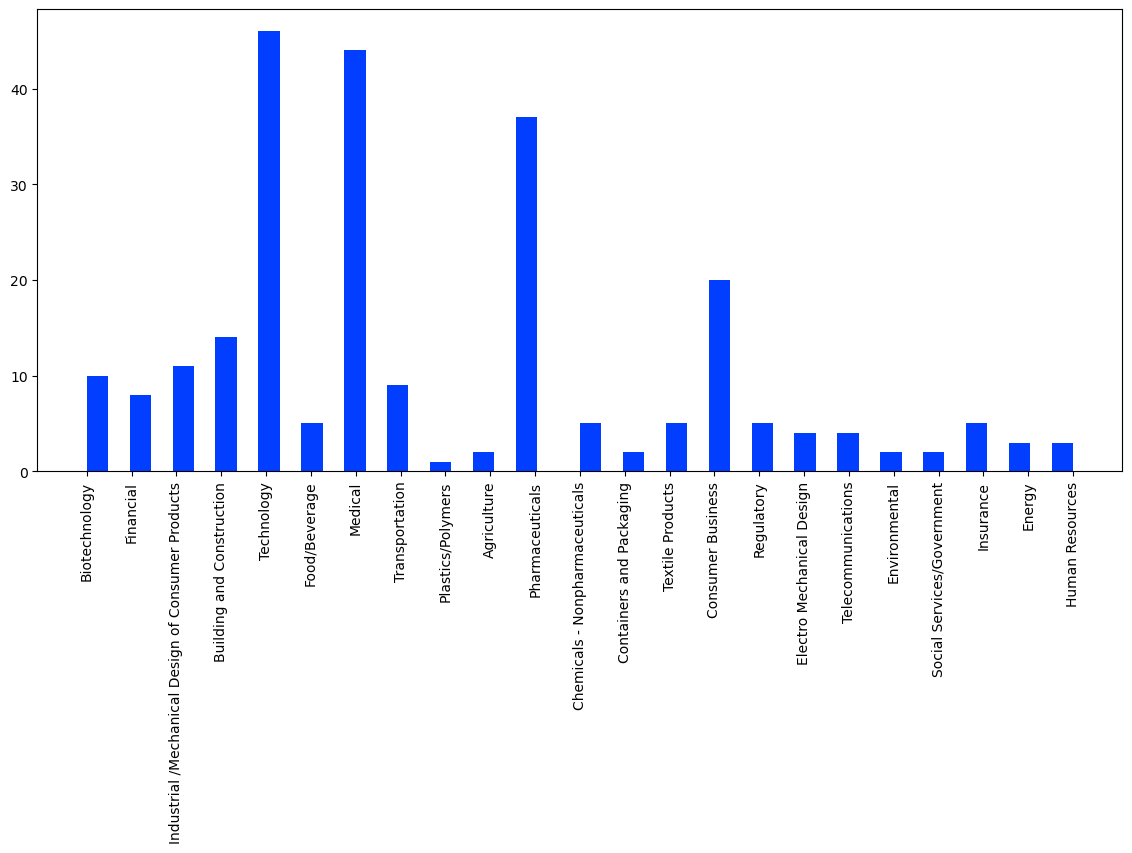

In [1617]:
plt.figure(figsize=(14, 6))
plt.hist(contract_hours['Subject'], bins=46)
plt.xticks(rotation=90)
plt.show()

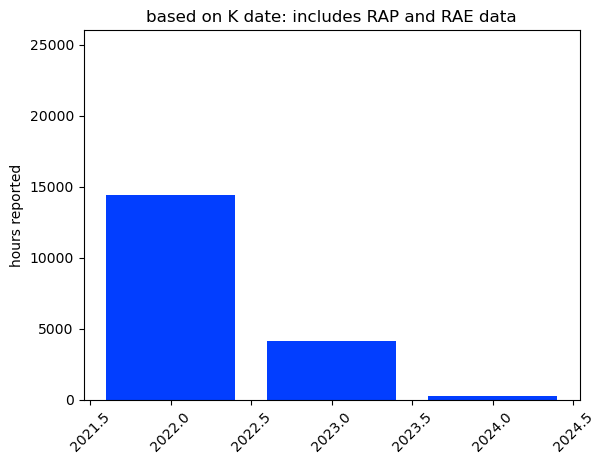

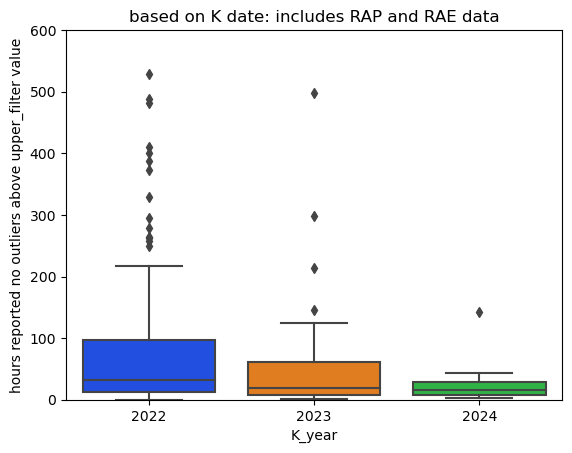

In [1363]:
# Look at all data hours reported across the years
# extract year from date column of contract date
contract['K_year'] = contract['K Date'].dt.year

# filter contract data for no hours reported and high-end outliers
upper_filter=4100
contract_filtered = contract[(contract['Hours Reported'] >0) & (contract['Hours Reported'] <= upper_filter)]

# Group by contract year and sum 'Hours Reported'
hours_by_year = contract.groupby('K_year')['Hours Reported'].sum().reset_index()

#show hours reported related to time
plt.bar(hours_by_year['K_year'],hours_by_year['Hours Reported'])
plt.xticks(rotation=45)
plt.ylim(0, 26000)
plt.title('based on K date: includes RAP and RAE data')
plt.ylabel('hours reported')
plt.show()
plt.clf()

# box plot grouped by year
sns.boxplot(data=contract_filtered, x="K_year", y="Hours Reported")
plt.ylim(0, 600)
plt.title('based on K date: includes RAP and RAE data')
plt.ylabel('hours reported no outliers above upper_filter value')
plt.show()

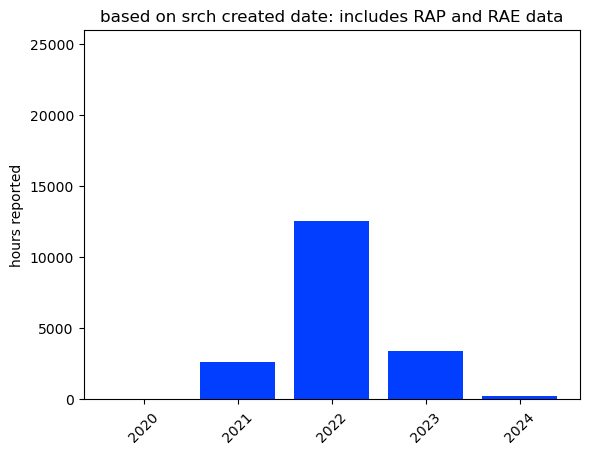

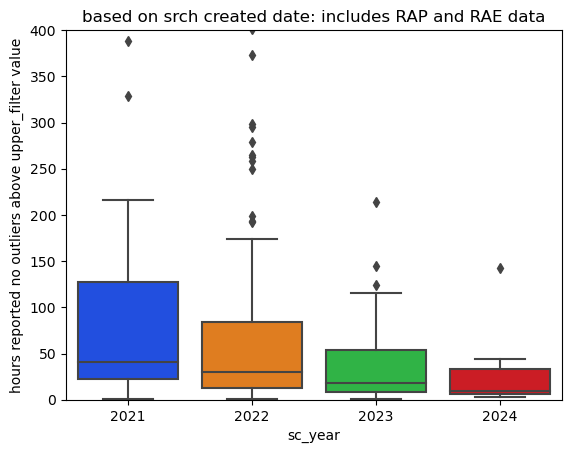

In [1365]:
# Look at all data hours reported across the years
# extract year from date column of search created
contract['sc_year'] = contract['Srch Created'].dt.year

# filter contract data for no hours reported and high-end outliers
upper_filter=4100
contract_filtered = contract[(contract['Hours Reported'] >0) & (contract['Hours Reported'] <= upper_filter)]

# Group by search created year and sum 'Hours Reported'
hours_by_year = contract.groupby('sc_year')['Hours Reported'].sum().reset_index()

#show hours reported related to time
plt.bar(hours_by_year['sc_year'],hours_by_year['Hours Reported'])
plt.xticks(rotation=45)
plt.ylim(0, 26000)
plt.title('based on srch created date: includes RAP and RAE data')
plt.ylabel('hours reported')
plt.show()
plt.clf()

# box plot grouped by year
sns.boxplot(data=contract_filtered, x="sc_year", y="Hours Reported")
plt.ylim(0, 400)
plt.title('based on srch created date: includes RAP and RAE data')
plt.ylabel('hours reported no outliers above upper_filter value')
plt.show()

In [1367]:
contract['Hours Reported'].describe()

count    294.000000
mean      63.915430
std      127.864927
min        0.000000
25%        4.000000
50%       19.125000
75%       61.445000
max      926.500000
Name: Hours Reported, dtype: float64

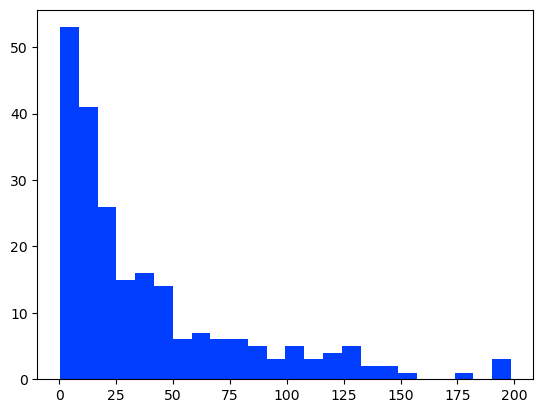

In [1369]:
# what are the most comon number of hours reported
# filter contract data for no hours reported 
contract_filtered_for0 = contract[(contract['Hours Reported'] >0)]
#plt.hist(contract_filtered_for0['Hours Reported'], bins=24)
# sns.histplot(contract_btwn0n200['Hours Reported'])

# filter contract data for no hours reported and high-end outliers
upper_filter=200
contract_filtered = contract[(contract['Hours Reported'] >0) & (contract['Hours Reported'] <= upper_filter)]
plt.hist(contract_filtered['Hours Reported'], bins=24)

plt.show()

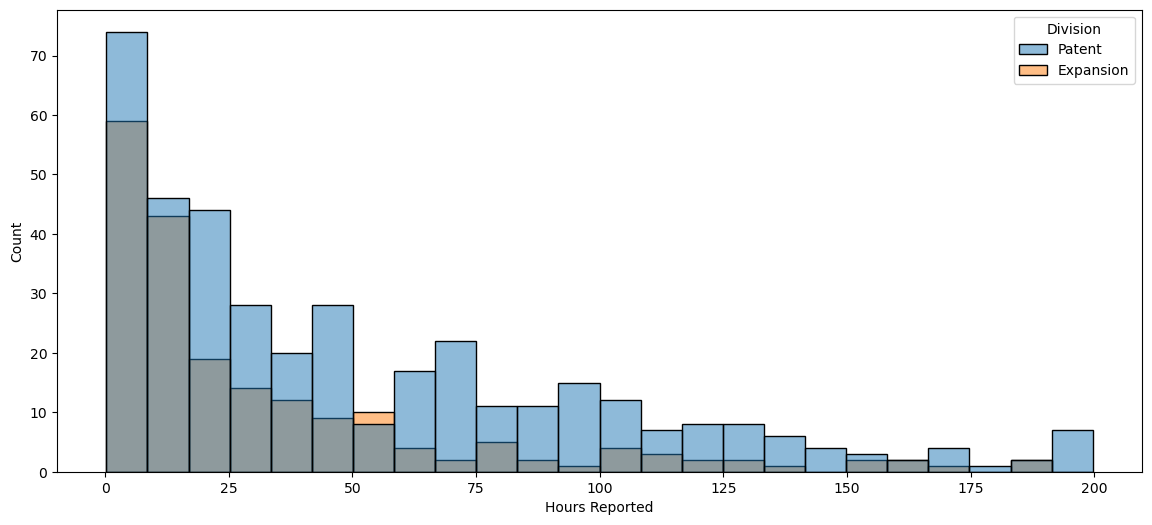

<Figure size 640x480 with 0 Axes>

In [1124]:
# filter contract data for no hours reported and high-end outliers
upper_filter=200
contract_filtered = contract[(contract['Hours Reported'] >0) & (contract['Hours Reported'] <= upper_filter)]

# comparison of hours reported for Patent to Expansion
plt.figure(figsize=(14, 6))
sns.histplot(contract_filtered, x = "Hours Reported", hue = 'Division', bins=24)

plt.show()
plt.clf()

/Users/lynbodmer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


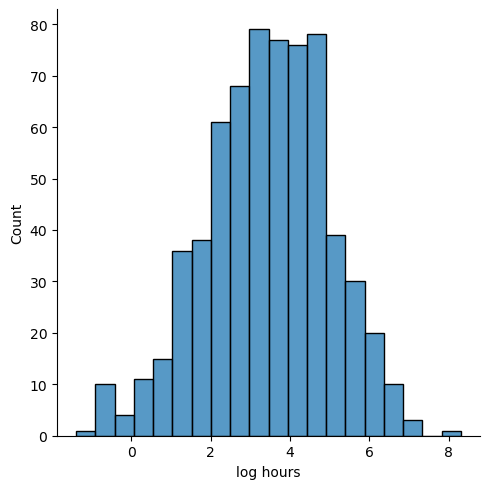

In [1126]:
# log tranformation of hours reported distribution
log_hours = contract['Hours Reported'][contract['Hours Reported']>0]
log_hours = np.log(log_hours)
sns.displot(log_hours)
plt.xlabel('log hours')
plt.show()

# This plot indicates that log hours reported is unimodal and approximately normally distributed. 
# This is helpful knowledge if we want to build a model to predict hours reported in the future.

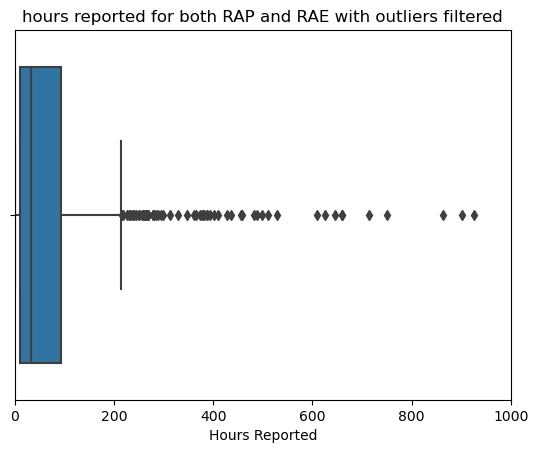

upper limit filter 1000


count    653.000000
mean      78.982002
std      123.957167
min        0.250000
25%       11.000000
50%       33.000000
75%       92.750000
max      926.500000
Name: Hours Reported, dtype: float64

In [1231]:
# filter contract data for no hours reported and high-end outliers
upper_filter=1000
contract_filtered = contract[(contract['Hours Reported'] >0) & (contract['Hours Reported'] <= upper_filter)]

# box indicates middle 50% of data
sns.boxplot(x='Hours Reported', data=contract_filtered)
plt.title("hours reported for both RAP and RAE with outliers filtered")
plt.xlim(0,1000)
plt.show()
print("upper limit filter", upper_filter)
contract_filtered['Hours Reported'].describe()


In [1130]:
# look at contract data for just RAP searches
contract_RAP=contract[contract['Division'] == 'Patent']

In [1132]:
# Group by search created year and sum 'Hours Reported'
hours_by_year = contract.groupby('sc_year')['Hours Reported'].sum().reset_index()

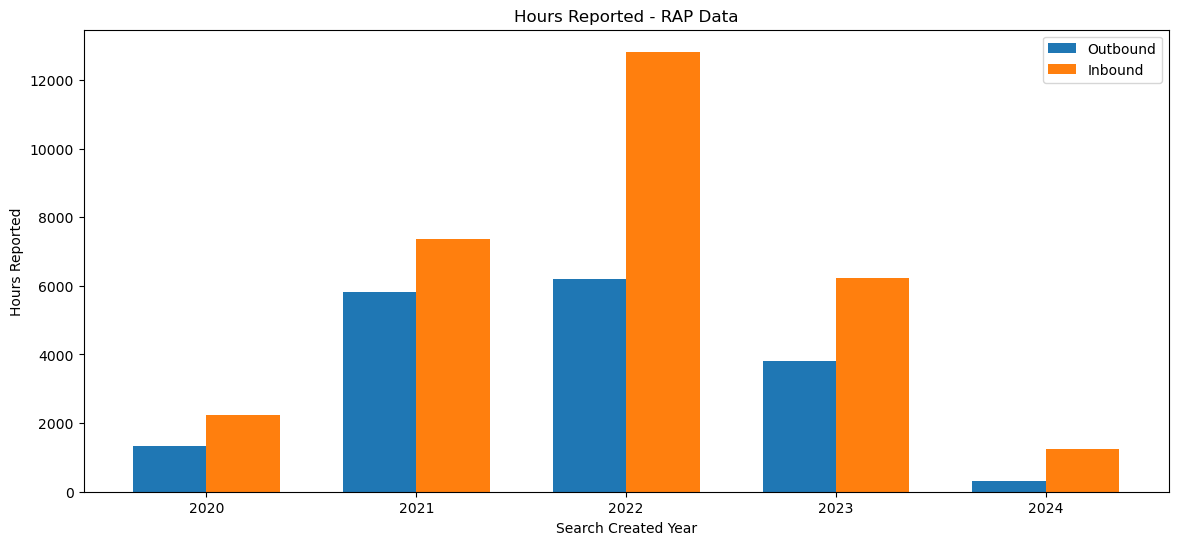

In [1134]:
#filter contract_RAP for outbound and inbound searches
RAPcontract_outbound=contract_RAP[(contract_RAP['Source']=='Outbound')]
RAPcontract_inbound=contract_RAP[(contract_RAP['Source']=='Inbound')]

# Group by year and sum Hours Reported:
RAPoutbound_hours_by_year = RAPcontract_outbound.groupby('sc_year')['Hours Reported'].sum()
RAPinbound_hours_by_year = RAPcontract_inbound.groupby('sc_year')['Hours Reported'].sum()

# Define positions and width for the bars:
years = sorted(set(contract_RAP['sc_year']))
width = 0.35
positions_outbound = [year - width/2 for year in years]
positions_inbound = [year + width/2 for year in years]

# plot outbound and inbound hours reported side by side
plt.figure(figsize=(14, 6))
plt.bar(positions_outbound, RAPoutbound_hours_by_year, width=width, label='Outbound')
plt.bar(positions_inbound, RAPinbound_hours_by_year, width=width, label='Inbound')
plt.xticks(years)
plt.xlabel('Search Created Year')
plt.ylabel('Hours Reported')
plt.title('Hours Reported - RAP Data')
plt.legend()
plt.show()

upper_filter value =  1000


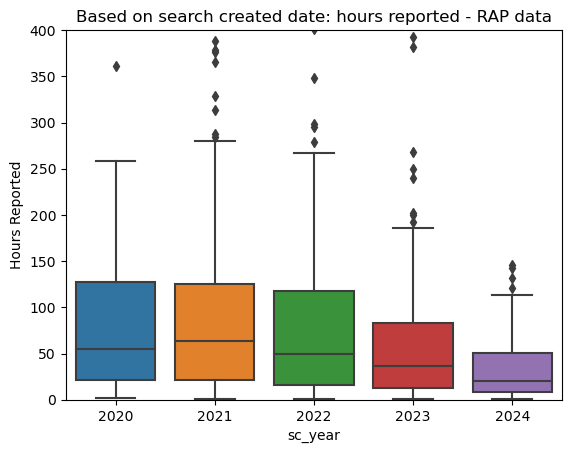

In [1237]:
# filter RAP contract data for no hours reported and high-end outliers
upper_filter=1000
contract_RAP_filtered = contract_RAP[(contract_RAP['Hours Reported'] > 0) & (contract_RAP['Hours Reported'] <= upper_filter)]
print("upper_filter value = ", upper_filter)

# box plot grouped by year
sns.boxplot(data=contract_RAP_filtered, x="sc_year", y="Hours Reported")
plt.ylim(0, 400)
plt.title('Based on search created date: hours reported - RAP data')
plt.show()

upper_filter value =  50000


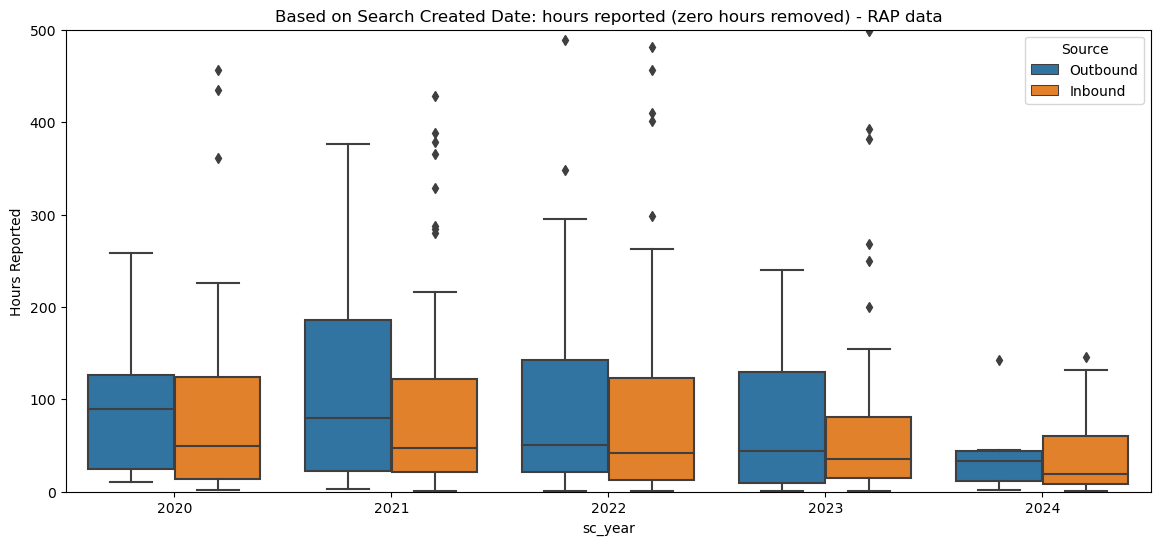

In [1139]:

# filter RAP contract data for no hours reported and high-end outliers
upper_filter=50000
contract_RAP_filtered = contract_RAP[(contract_RAP['Hours Reported'] > 0) & (contract_RAP['Hours Reported'] <= upper_filter)]
print("upper_filter value = ", upper_filter)

# box plot grouped by year
plt.figure(figsize=(14, 6))
sns.boxplot(data=contract_RAP_filtered, x="sc_year", y="Hours Reported", hue='Source')
plt.ylim(0, 500)
plt.title('Based on Search Created Date: hours reported (zero hours removed) - RAP data')
plt.show()

upper_filter value =  500


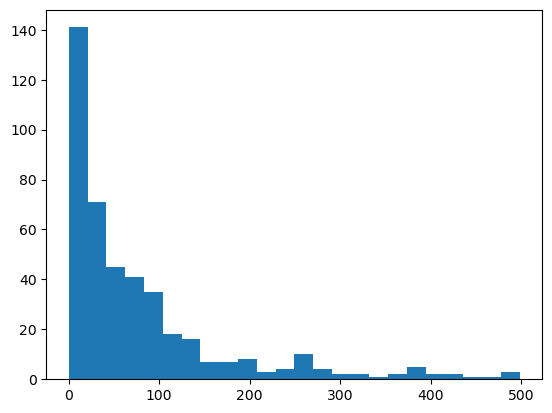

In [1141]:
# what are the most comon number of hours reported

# filter RAP contract data for no hours reported and high-end outliers
upper_filter=500
contract_RAP_filtered = contract_RAP[(contract_RAP['Hours Reported'] > 0) & (contract_RAP['Hours Reported'] <= upper_filter)]
print("upper_filter value = ", upper_filter)

plt.hist(contract_RAP_filtered['Hours Reported'], bins=24)
plt.show()

/Users/lynbodmer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


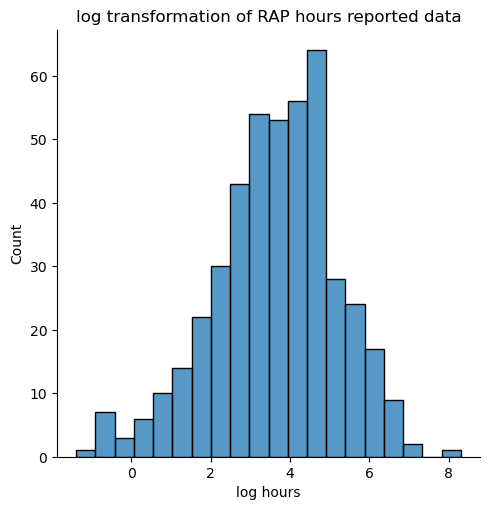

In [1143]:
# log tranformation of RAP hours reported distribution
log_hours = contract_RAP['Hours Reported'][contract_RAP['Hours Reported']>0]
log_hours = np.log(log_hours)
sns.displot(log_hours)
plt.xlabel('log hours')
plt.title('log transformation of RAP hours reported data')
plt.show()

# This plot indicates that log hours reported is unimodal and approximately normally distributed. 
# This is helpful knowledge if we want to build a model to predict hours reported in the future.

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 1099
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Record Id         755 non-null    object        
 1   Search Name       755 non-null    object        
 2   Srch Created      755 non-null    datetime64[ns]
 3   Type of Case      755 non-null    object        
 4   Subject           755 non-null    object        
 5   Case Mgr          755 non-null    object        
 6   Primary Law Firm  755 non-null    object        
 7   Search Stage      755 non-null    object        
 8   K Date            755 non-null    datetime64[ns]
 9   K_Month-Year      755 non-null    period[M]     
 10  SC_Month-Year     755 non-null    period[M]     
 11  Source            755 non-null    object        
 12  Division          755 non-null    object        
 13  Clone?            755 non-null    bool          
 14  Hours Reported    755 non-null

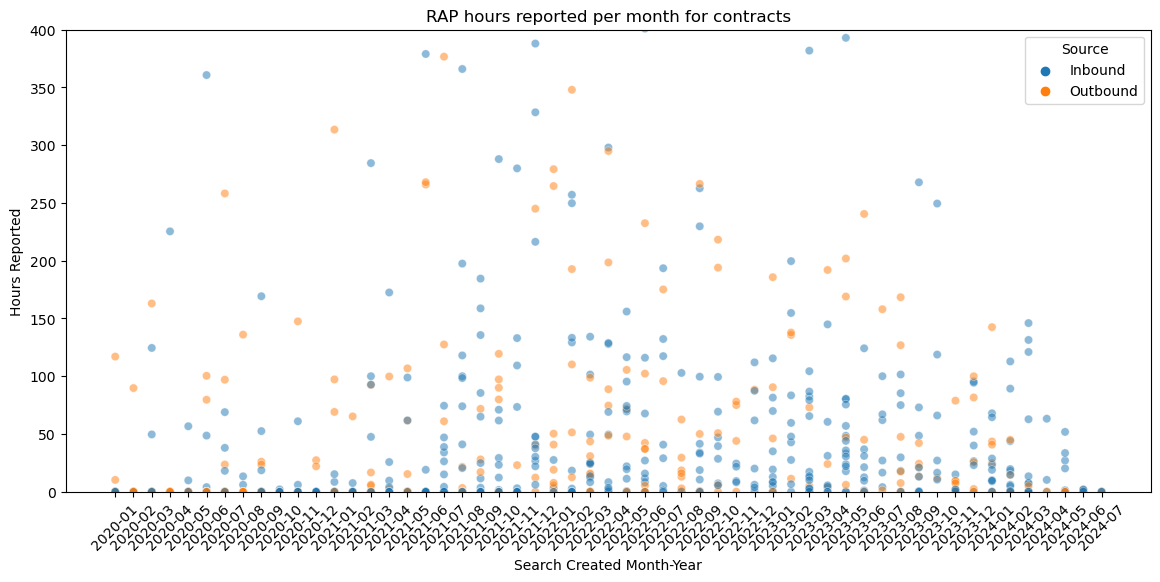

In [1159]:
#create scatter plot of RAP hours reported per month. 

# Filter data to limit 'Hours Reported' to limit
limit = 4100
contract_RAPfiltered = contract_RAP[(contract_RAP['Hours Reported'] >= 0) & (contract_RAP['Hours Reported'] <= limit)]
print(contract_RAP.info())

# Sort the DataFrame by 'K Date' to ensure correct order
contract_RAPfiltered = contract_RAPfiltered.sort_values(by='Srch Created')
#correct error for SC_Month-Year from period to str
contract_RAPfiltered['SC_Month-Year'] = contract_RAPfiltered['SC_Month-Year'].astype(str)

plt.figure(figsize=(14, 6))
sns.scatterplot(x='SC_Month-Year', y='Hours Reported', data=contract_RAPfiltered, hue='Source', alpha=0.5)
plt.title('RAP hours reported per month for contracts')
plt.ylim(0, 400)

plt.xticks(rotation=45)
plt.xlabel('Search Created Month-Year')
plt.show()
#

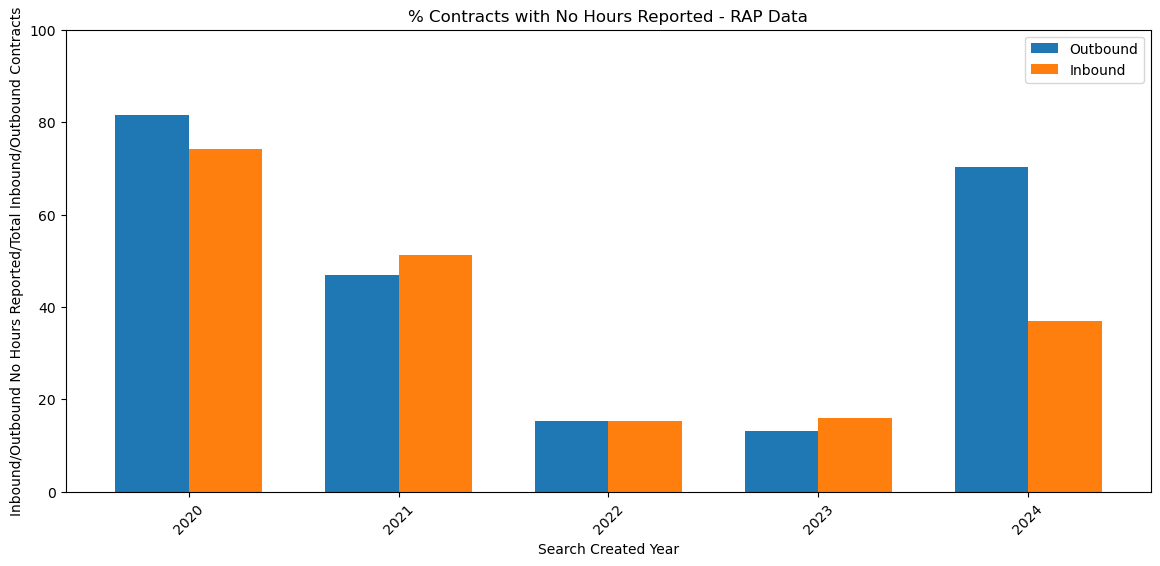

In [1161]:
# filter RAP contract data for contracts with no hours reported 
contract_RAP_filtered = contract_RAP[(contract_RAP['Hours Reported'] == 0)] 

#filter for all Outbound and Inbound searches 
#contract_RAP count is 755
#Outbound_total count is 285
#Outbound_total count is 470
Outbound_total=contract_RAP[(contract_RAP['Source']=='Outbound')]
Inbound_total=contract_RAP[(contract_RAP['Source']=='Inbound')]

#filter contract_RAP_filtered for outbound and inbound searches
contract_outbound=contract_RAP_filtered[(contract_RAP_filtered['Source']=='Outbound')]
contract_inbound=contract_RAP_filtered[(contract_RAP_filtered['Source']=='Inbound')]

# Group by year and count searches with no Hours Reported. Divide by total count by :
outbound_hours_by_year = contract_outbound.groupby('sc_year')['Hours Reported'].count()/Outbound_total.groupby('sc_year')['Hours Reported'].count()*100
inbound_hours_by_year = contract_inbound.groupby('sc_year')['Hours Reported'].count()/Inbound_total.groupby('sc_year')['Hours Reported'].count()*100

# Define positions and width for the bars:
years = sorted(set(contract_RAP_filtered['sc_year']))
width = 0.35
positions_outbound = [year - width/2 for year in years]
positions_inbound = [year + width/2 for year in years]

# plot outbound and inbound hours reported side by side
plt.figure(figsize=(14, 6))
plt.bar(positions_outbound, outbound_hours_by_year, width=width, label='Outbound')
plt.bar(positions_inbound, inbound_hours_by_year, width=width, label='Inbound')
plt.xticks(years)
plt.xlabel('Search Created Year')
plt.ylabel('Inbound/Outbound No Hours Reported/Total Inbound/Outbound Contracts')
plt.title('% Contracts with No Hours Reported - RAP Data')
plt.ylim(0, 100)

plt.xticks(rotation=45)
plt.legend()
plt.show()

/var/folders/rb/1vf00zrd5fzfvg8dgkbyf5hr0000gn/T/ipykernel_86317/3280968622.py:16: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='SC_Month-Year', y='Hours Reported', data=contract_filtered, hue='Type of Case', alpha=0.8, palette=palette)


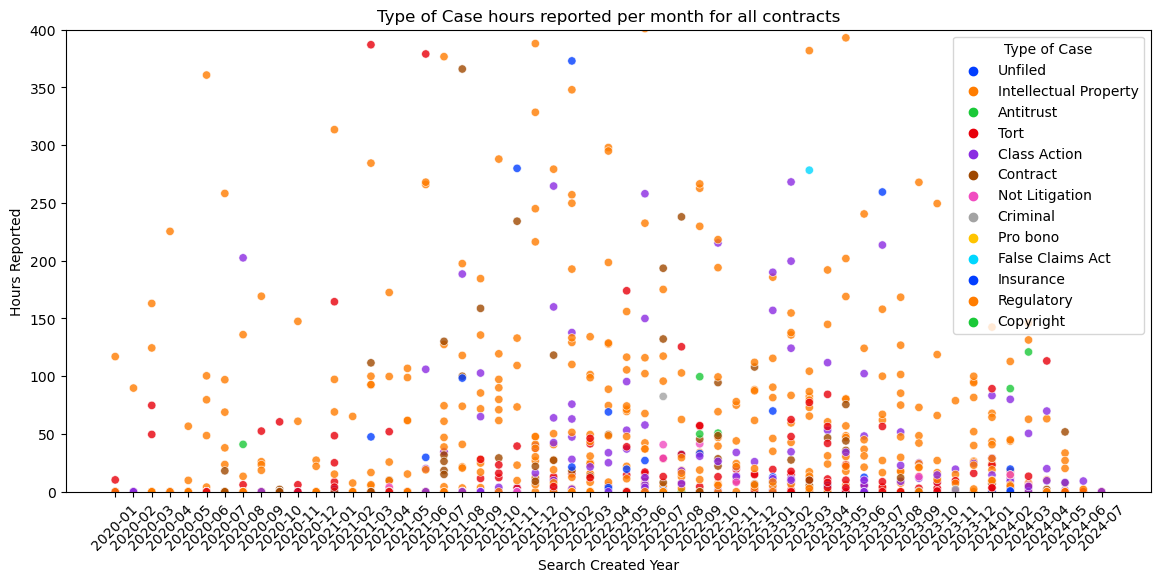

In [1281]:
#create scatter plot of RAP hours reported per month viewed by type of case. 

# Filter data to limit 'Hours Reported' to limit
limit = 4100
contract_filtered = contract[(contract['Hours Reported'] >= 0) & (contract['Hours Reported'] <= limit)]

# Sort the DataFrame by 'Search Created Date' to ensure correct order
contract_filtered = contract_filtered.sort_values(by='Srch Created')
#correct error for SC_Month-Year from period to str
contract_filtered['SC_Month-Year'] = contract_filtered['SC_Month-Year'].astype(str)

plt.figure(figsize=(14, 6))

# Define the color palette
palette = sns.color_palette("bright")

sns.scatterplot(x='SC_Month-Year', y='Hours Reported', data=contract_filtered, hue='Type of Case', alpha=0.8, palette=palette)

plt.title('Type of Case hours reported per month for all contracts')
plt.ylim(0, 400)
plt.xlabel('Search Created Year')
plt.xticks(rotation=45)
plt.show()

In [1167]:
contract_filtered['Type of Case'].value_counts()

Type of Case
Intellectual Property    628
Tort                     158
Class Action             151
Contract                  81
Unfiled                   46
Not Litigation            19
Antitrust                 10
Criminal                   3
Pro bono                   1
False Claims Act           1
Insurance                  1
Regulatory                 1
Copyright                  1
Name: count, dtype: int64

upper_filter value =  4100


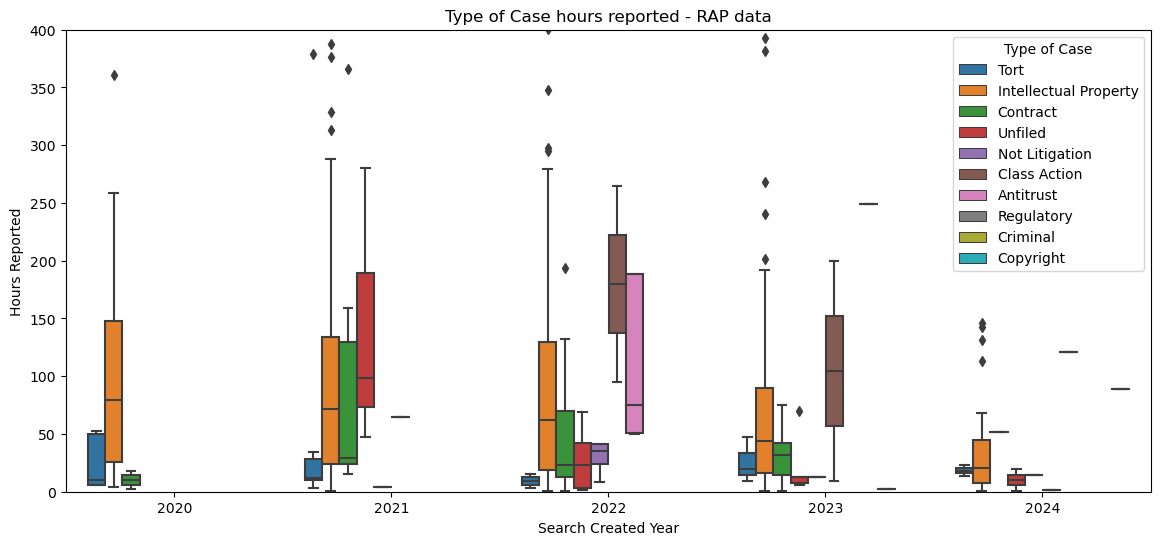

In [1195]:
# filter RAP contract data for no hours reported and high-end outliers
upper_filter=4100
contract_RAP_filtered = contract_RAP[(contract_RAP['Hours Reported'] > 0) & (contract_RAP['Hours Reported'] <= upper_filter)]
print("upper_filter value = ", upper_filter)

# box plot grouped by year
plt.figure(figsize=(14, 6))
sns.boxplot(data=contract_RAP_filtered, x="sc_year", y="Hours Reported", hue='Type of Case')
plt.xlabel('Search Created Year')

plt.ylim(0, 400)
plt.title('Type of Case hours reported - RAP data')
plt.show()

upper_filter value =  1500


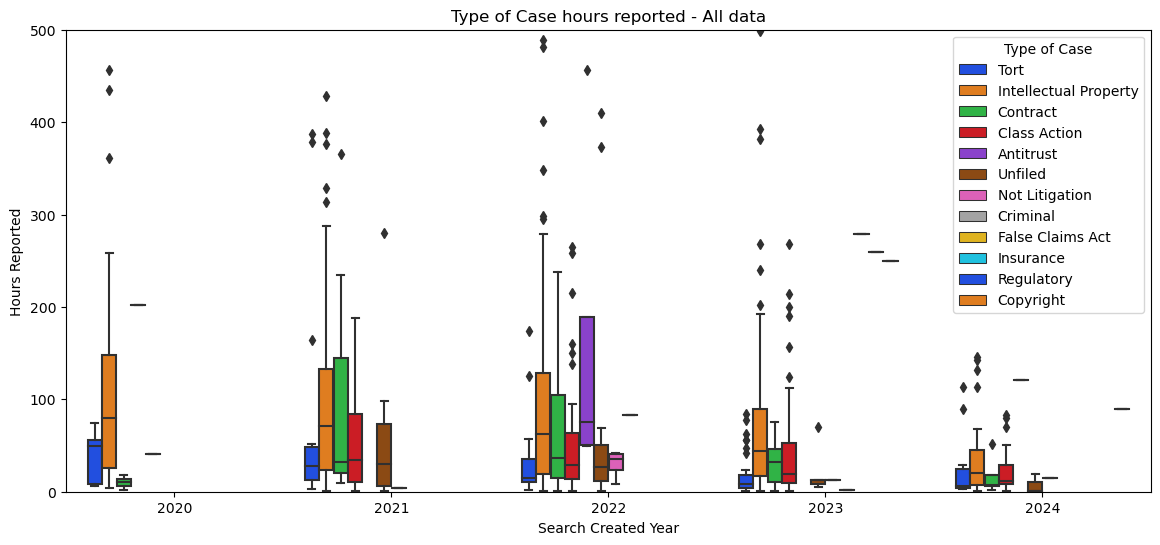

In [1283]:
# filter contract data for no hours reported and high-end outliers
upper_filter=1500
contract_filtered = contract[(contract['Hours Reported'] > 0) & (contract['Hours Reported'] <= upper_filter)]
print("upper_filter value = ", upper_filter)

# box plot grouped by year
plt.figure(figsize=(14, 6))

# Define the color palette
palette = sns.color_palette("bright")

sns.boxplot(data=contract_filtered, x="sc_year", y="Hours Reported", hue='Type of Case', palette = palette)
plt.xlabel('Search Created Year')
plt.ylim(0, 500)
plt.title('Type of Case hours reported - All data')
plt.show()

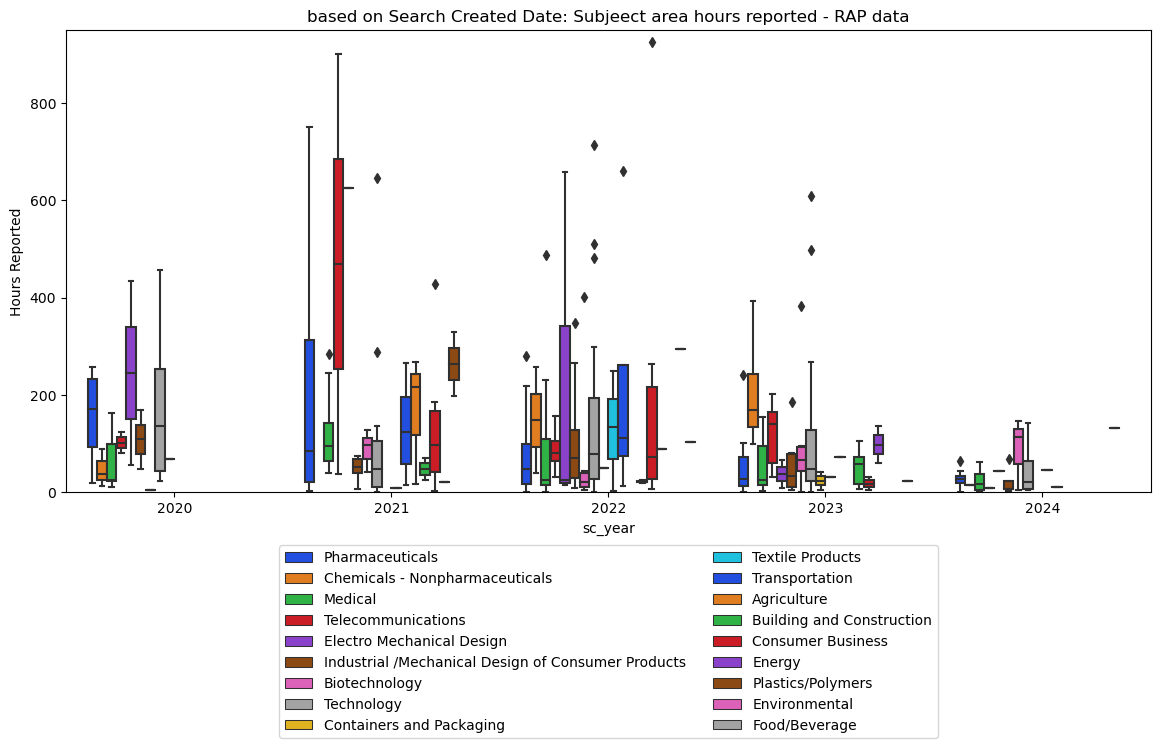

In [1285]:
#filter RAP Contract data for IP cases
contract_RAP=contract[contract['Division'] == 'Patent']
RAP_IP = contract_RAP[(contract_RAP['Type of Case'] == 'Intellectual Property') ]

# filter RAP_IP for no hours reported 
RAP_IP_filtered = RAP_IP[(RAP_IP['Hours Reported'] > 0) ]

# Define the color palette
palette = sns.color_palette("bright")

# box plot grouped by year
plt.figure(figsize=(14, 6))
sns.boxplot(data=RAP_IP_filtered, x="sc_year", y="Hours Reported", hue='Subject', palette=palette)
# Place the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.ylim(0, 950)
plt.title('based on Search Created Date: Subjeect area hours reported - RAP data')
plt.show()

In [1213]:
#look at grouping subject areas into bigger buckets to get more data for analysis. The grouped buckets are as follows:
MedPharmBio = ['Biotechnology','Medical','Pharmaceuticals']
FinInsReg= ['Financial','Insurance','Regulatory']
AgBandCEnvEnrg=['Agriculture','Building and Construction','Environmental','Energy']
NonPharmFoodText=['Chemicals - Nonpharmaceuticals','Food/Beverage','Textile Products'] 
CBusSSGovHR=['Consumer Business','Social Services/Government','Human Resources']
IndDesPlasticContainersEMDesTrans=['Industrial /Mechanical Design of Consumer Products','Plastics/Polymers','Containers and Packaging','Electro Mechanical Design','Transportation']
TechTelecom=['Technology','Telecommunications']

# Define a custom grouping of 'Subject' areas
def custom_group_subject(subject):
    if subject in MedPharmBio:
        return 'Biotechnology, Medical, Pharmaceuticals'
    elif subject in FinInsReg:
        return 'Financial,Insurance,Regulatory'
    elif subject in AgBandCEnvEnrg:
        return 'Agriculture,Building and Construction,Environmental,Energy'
    elif subject in NonPharmFoodText:
        return 'Chemicals - Nonpharmaceuticals,Food/Beverage,Textile Products'
    elif subject in CBusSSGovHR:
        return 'Consumer Business,Social Services/Government,Human Resources'
    elif subject in IndDesPlasticContainersEMDesTrans:
        return 'Industrial /Mechanical Design of Consumer Products,Plastics/Polymers,Containers and Packaging,Electro Mechanical Design,Transportation'
    else:
        return 'Technology,Telecommunications'


# Group by 'Type of Case' and 'Subject', then aggregate
contract['Grouped Subject']=contract['Subject'].apply(custom_group_subject)
# contract.head()


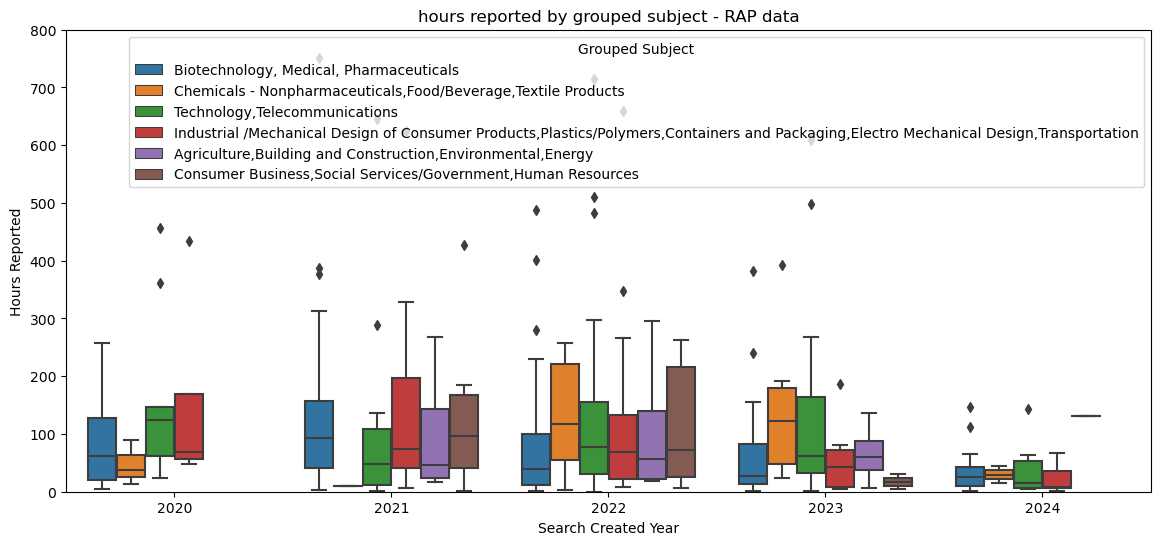

In [1211]:
# use grouped subject field for data analysis
#filter RAP Contract data for IP cases
contract_RAP=contract[contract['Division'] == 'Patent']
RAP_IP = contract_RAP[(contract_RAP['Type of Case'] == 'Intellectual Property') ]

# filter RAP_IP for no hours reported 
RAP_IP_filtered = RAP_IP[(RAP_IP['Hours Reported'] > 0) ]

# box plot grouped by year
plt.figure(figsize=(14, 6))
sns.boxplot(data=RAP_IP_filtered, x="sc_year", y="Hours Reported", hue='Grouped Subject')
# Place the legend below the plot
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xlabel("Search Created Year")
plt.ylim(0, 800)
plt.title('hours reported by grouped subject - RAP data')
plt.show()